# Assignment Overview


## Background Story  

In the ever-evolving landscape of e-commerce, understanding customer behavior has become a cornerstone of strategic marketing. An emerging e-commerce giant, "FarTrend," has experienced rapid growth by offering a wide range of products from fashion to electronics, catering to over 3400 customers across diverse demographics. Despite their success, FarTrend faces challenges in personalizing marketing efforts and predicting future purchasing behavior, crucial for sustaining growth and enhancing customer satisfaction.

## The Challenge

FarTrend's extensive customer database reveals purchasing patterns over the past year but lacks actionable insights to anticipate the needs of new customers. Traditional marketing strategies have yielded moderate success; however, the leadership team believes that a more data-driven approach could unlock exponential growth.

You are working on the marketing intelligence team! Your goal is to develop a  machine learning model that segments FarTrend's customer base and predicts future purchases of new customers within their first year. This model aims to transform FarTrend approach to customer engagement by delivering personalized marketing campaigns and tailored product recommendations.

## Data Description

The IT extracted a dataframe with the main transaction performed by the customers. 

##### Variables
InvoiceNo: Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name.

Quantity: The quantities of each product (item) per transaction. 

InvoiceDate: The day and time when each transaction was generated.

UnitPrice: Product price per unit.

CustomerID: Unique customer number. 

Country: The name of the country where each customer resides.

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

## Question 1: Data Quality and Customer Understanding (30 points)

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)


<u>**Metrics to measure the data quality**</u>

• *Completeness*:
Data values are present<br><br>
• *Consistency*:
Data satisfies constraints (format, allowable ranges and values, domain rules)<br><br>
• *Correctness*:
Values are true and unbiased with respect to their real-world state<br><br>
• *Uniqueness*:
Records representing a single customer are not replicated<br><br>
• *Timeliness*:
Data is up-to-date to their real-world state for the task in hand<br><br>
• *Stability*:
Data inherent concepts and statistics are comparable among sources over time<br><br>
• *Relevance*:
Data is useful for the task<br><br>
• *Contextualization*:
Data is annotated with the acquisition context, their meaning and semantics<br><br>
• *Trustworthiness*:
Data can be trusted based on the reputation of the stakeholders involved in data acquisition

##### Given Data

In [2]:
# load in the FarTrend_eRetail.xlsx
transaction_df = pd.read_excel('FarTrend_eRetail.xlsx')
transaction_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


The dataset has 541,909 rows and 8 columns. Before jumping into the EDA, I have to start with cleaning the dataset. Thus, my first step will be taking a look at the **completeness** of the data by looking at missing values.

In [3]:
# check for missing values
transaction_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The metric **completeness** is not yet satisfied, as there are 1,454 missing values in the column `Describtion` and 135,080 missing values in `CustomerID`. 

In [4]:
transaction_df[transaction_df.Description.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [5]:
transaction_df[transaction_df.Description.isna()].describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,1454.000000,1454,1454.0,0.0
mean,-9.359697,2011-05-22 18:40:24.883080960,0.0,NaN
min,-3667.000000,2010-12-01 11:52:00,0.0,NaN
25%,-24.000000,2011-03-22 17:04:15,0.0,NaN
50%,-3.000000,2011-05-03 13:35:30,0.0,NaN
75%,4.000000,2011-08-04 15:42:45,0.0,NaN
max,5568.000000,2011-12-08 14:06:00,0.0,NaN
std,243.238758,NaN,0.0,NaN


For the rows with missing values in `Description` there are also always missing values in `CustomerID`. Further, the `UnitPrice` is always zero. This suggests that the transactions represented by these rows may not have been completed, could be indicative of free samples, or might be data entry errors. For machine learning purposes, these rows may not provide useful information for predictive models. Thus, I simply remove those rows.

In [6]:
transaction_df = transaction_df.dropna(subset=['Description'])
transaction_df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

I continue with the work on the metric **completeness** by further investigating the missing values (133,626) in `CustomerID`. Based on the assumption that each invoice number is associated with a unique customer ID, meaning if the same invoice number appears more than once in your dataset, it corresponds to the same customer each time, I try to use the `InvoideNo`for imputing missing values in the `CustomerID`column.

In [7]:
# Step 1: Create a mapping from InvoiceNo to CustomerID where CustomerID is not NaN
invoice_customer_map = transaction_df.dropna(subset=["CustomerID"]).drop_duplicates("InvoiceNo").set_index("InvoiceNo")["CustomerID"].to_dict()

# Step 2: Impute missing CustomerIDs based on the InvoiceNo to CustomerID mapping
transaction_df["CustomerID"] = transaction_df.apply(lambda row: invoice_customer_map.get(row["InvoiceNo"], row["CustomerID"]), axis=1)

transaction_df.isna().sum()

/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_37405/321377124.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df["CustomerID"] = transaction_df.apply(lambda row: invoice_customer_map.get(row["InvoiceNo"], row["CustomerID"]), axis=1)


InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

Unfortunatley, this did not change anything. This implies that either all invoice numbers associated with missing customer IDs do not have a corresponding customer ID in the dataset, or there are no repeated invoice numbers with both populated and missing customer IDs. As I cannot trust those data (metric: **correctness**), and imputation is not possible, I will simply drop those rows.

In [8]:
# drop na values in CustomerID
transaction_df = transaction_df.dropna(subset=['CustomerID'])

This ensures **completeness** in the dataset. Next, I will look at the metric **uniqueness** by firstly dropping all rows that are duplicates.

In [9]:
# drop duplicates
print(f"The dataset had {transaction_df.duplicated().sum()} duplicate rows that I removed.")
transaction_df = transaction_df.drop_duplicates()
transaction_df.nunique()

The dataset had 5225 duplicate rows that I removed.


InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

Having duplicates in single columns makes perfectly sense. Before saying that the metric **uniqueness** is fully satisfied, I should, after looking at the descirption of each variable, I know that the `StockCode` is a 5-digit integral number *uniquely* assigned to each distinct product. I still have to check if this is really given.

In [10]:
# check if there are multiple stock codes for the same description
transaction_df.groupby('Description')['StockCode'].nunique().sort_values(ascending=False)

Description
METAL SIGN,CUPCAKE SINGLE HOOK      3
SQUARE CHERRY BLOSSOM CABINET       2
RETRO PLASTIC 70'S TRAY             2
PINK FLOWERS RABBIT EASTER          2
ROUND BLUE CLOCK WITH SUCKER        2
                                   ..
FOUR RABBIT EASTER DECORATIONS      1
FRAPPUCINO SCARF KNITTING KIT       1
FREESTYLE CANVAS ART PICTURE        1
FRENCH BATHROOM SIGN BLUE METAL     1
ZINC WIRE SWEETHEART LETTER TRAY    1
Name: StockCode, Length: 3896, dtype: int64

Here, I can see, that the `StockCode` is actually not uniquely assigned to each distinct product. Instead of dropping those rows immediately, I want to first check if I can impute them. 

In [11]:
# list of descriptions with multiple stock codes
multiple_sc = transaction_df.groupby('Description')['StockCode'].nunique()
multiple_sc = multiple_sc[multiple_sc > 1].index
transaction_df.loc[transaction_df.Description.isin(multiple_sc)].groupby('Description')['StockCode'].value_counts()

Description                      StockCode
COLOURING PENCILS BROWN TUBE     10133        123
                                 10135        120
COLUMBIAN CANDLE RECTANGLE       72131         18
                                 72133         14
COLUMBIAN CANDLE ROUND           72128         33
                                 72130         25
EAU DE NILE JEWELLED PHOTOFRAME  85023B        14
                                 85024B        12
FRENCH FLORAL CUSHION COVER      20840         45
                                 20837         15
FRENCH LATTICE CUSHION COVER     20838         34
                                 20835          7
FROSTED WHITE BASE               79403         11
                                 79406          6
METAL SIGN,CUPCAKE SINGLE HOOK   82613B        46
                                 82613C        38
                                 82613A        14
PAPER LANTERN 9 POINT SNOW STAR  23041         43
                                 23040          4
PINK FA

Looking at the distribution of value counts of stock types for each product description that is linked to more than one unique stock code, I can see that imputation is not straight forward, as the value counts of stock codes within each description group are too similar. I would need a business expert here for clarification. As I dont have the opportunity to talk to one, I will only focus on the correct assigned instances in my analysis, i.e. drop those rows that contain a product that has multiple stock types.

In [12]:
transaction_df.shape

(401604, 8)

In [13]:
# drop rows that have a product with multiple stock codes

transaction_df = transaction_df.drop(transaction_df[transaction_df.Description.isin(multiple_sc)].index)

In [14]:
transaction_df.shape

(400606, 8)

This let to a reduction of another 1000 rows. I should do the same analysis for `InvoiceNo` and `InvoiceDate`:

In [15]:
transaction_df.groupby('InvoiceNo')['InvoiceDate'].nunique().sort_values(ascending=False)

InvoiceNo
542806     2
541849     2
536591     2
576057     2
541596     2
          ..
555133     1
555127     1
555125     1
555124     1
C581569    1
Name: InvoiceDate, Length: 22182, dtype: int64

Again, the `InvoiceNo` has not a unique `InvoiceDate`.

In [16]:
multiple_dates = transaction_df.groupby('InvoiceNo')['InvoiceDate'].nunique()
multiple_dates = multiple_dates[multiple_dates > 1].index
transaction_df.loc[transaction_df.InvoiceNo.isin(multiple_dates)].groupby('InvoiceNo')['InvoiceDate'].value_counts()

InvoiceNo  InvoiceDate        
536591     2010-12-01 16:57:00    34
           2010-12-01 16:58:00     6
540185     2011-01-05 13:40:00    19
           2011-01-05 13:41:00    10
541596     2011-01-19 16:19:00    68
                                  ..
576057     2011-11-13 15:06:00    17
578548     2011-11-24 15:02:00    47
           2011-11-24 15:03:00     2
C545569    2011-03-03 16:26:00     2
           2011-03-03 16:25:00     1
Name: count, Length: 62, dtype: int64

Here, I can see that the date is actually okay, but it is only the time (minute) that is different. Thus, in order to avoid duplicates, I can simply select the max value within each group for the InvoiceDate:

In [17]:
# Calculate the max InvoiceDate for each InvoiceNo group
transaction_df['MaxInvoiceDate'] = transaction_df.groupby('InvoiceNo')['InvoiceDate'].transform('max')

# Replace the original InvoiceDate with MaxInvoiceDate
transaction_df['InvoiceDate'] = transaction_df['MaxInvoiceDate']

# Delete the MaxInvoiceDate column
transaction_df.drop('MaxInvoiceDate', axis=1, inplace=True)

transaction_df.shape

(400606, 8)

Note: This did not change the shape of my dataset (obviously). 

Thus, I can now say that the metric **uniqueness** is satisfied. Before deepdiving into the data, I should firstly check the datatypes.

In [18]:
transaction_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [19]:
transaction_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

The datatypes seem to be fine. At first, one could think about the correctness of the datatype of InvoiceNo, but as it sometimes includes a "C" for cancelations, the current datatype is fine. Thus, while not entirely, one part of the metric **consistency** is satisfied.

In [20]:
transaction_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,400606.000000,400606,400606.000000,400606.000000
mean,12.186642,2011-07-10 13:07:12.501260288,3.479097,15281.173325
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 17:28:00,1.950000,15145.000000
75%,12.000000,2011-10-20 12:03:00,3.750000,16782.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.592764,NaN,69.850778,1713.952400


Quantity: min = -80995 and max = 80995, most of them low positive
unit price: min = 0 and max = 38970.000000, most of them rather low
number of invoices has a positive trend over time
low correlation between numerical features

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'InvoiceDate'}>],
       [<Axes: title={'center': 'UnitPrice'}>,
        <Axes: title={'center': 'CustomerID'}>]], dtype=object)

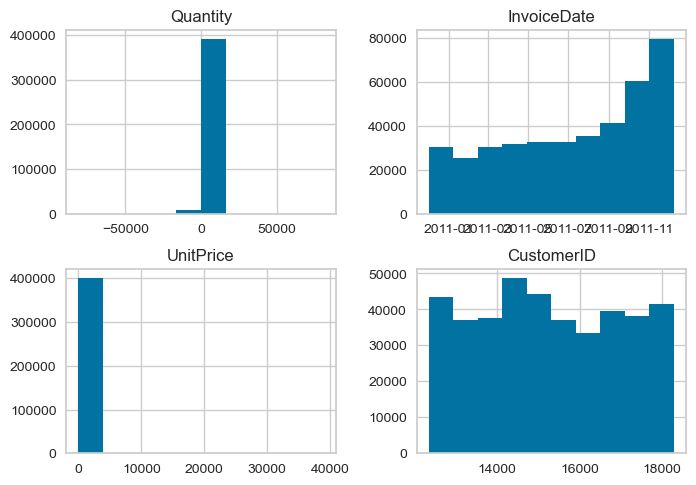

In [21]:
transaction_df.hist()

The data reveals a peculiar spread in the `Quantity` field, stretching from a startlingly low value of -80,995 to an equally surprising high of 80,995, though the bulk of the data clusters around modest positive numbers. `Unit Price` also shows a significant range from 0, hinting at free items or potential data entry issues, to an exorbitant peak of 38,970, yet most prices are reasonably low. Over time, there's an upward trend in the number of invoices, suggesting business growth or seasonal fluctuations.

I start by further investigating the data in the column `Quantity`. For that I first want to know whether there are cases where the Quantity is negative but the InvoiceNo does not start with a C or vice versa:

In [22]:
transaction_df[(transaction_df["Quantity"] < 0) & (~transaction_df["InvoiceNo"].astype(str).str.startswith("C"))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
transaction_df[(transaction_df["Quantity"] > 0) & (transaction_df["InvoiceNo"].astype(str).str.startswith("C"))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


It makes sense that this is not the case (metric: **correctness**).

<Axes: ylabel='Quantity'>

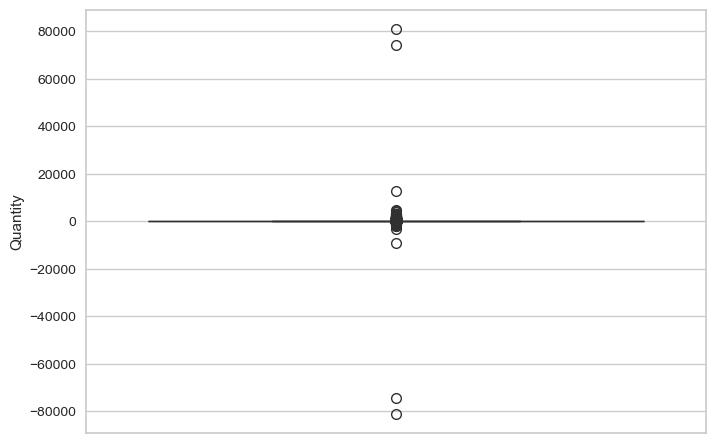

In [24]:
# boxplot of Quantity
sns.boxplot(transaction_df["Quantity"])

Here, I can see that those really extreme values, both positive and negative, have a huge impact on the quantities distribution. 

In [25]:
# find maximum absolute values of absolute value of Quantity using nlargest
transaction_df.loc[transaction_df["Quantity"].abs().nlargest(10).index]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom


As the given dataset data contains both sales and cancellations, there are duplicates in the dataset which are not directly considered as duplicates (metric: **uniqueness**). In cases like this, it becomes crucial to accurately reflect the net activity to understand the true performance metrics, inventory levels, and customer purchasing patterns. Cancellations can obscure the real revenue figures and inventory needs if they're not appropriately accounted for alongside their corresponding sales transactions. For that, I implemented the function `clean_cancellations`. This function methodically goes through the DataFrame and performs a series of steps to identify cancellations (negative quantities) and find their matching sales orders based on several criteria: `CustomerID`, `StockCode`, `Description`, `UnitPrice`, and the closest preceding `InvoiceDate`. Once a match is found, the function adjusts the quantity of the original order by adding the negative quantity of the cancellation, effectively nullifying its impact. This adjustment results in a dataset free of these cancellation transactions and their direct impacts, providing a cleaner and more accurate view of the data for analysis. The function repeats this process in a loop up to ten times or until no further cancellations that match the criteria are found, ensuring comprehensive cleanup. This iterative approach is designed to catch and correct for all potential matches, significantly improving the dataset's accuracy and utility for subsequent analysis or reporting tasks.

In [26]:
def clean_cancellations(df):
    """
    This function cleans the cancellations in the transaction DataFrame.

    Parameters:
    ----------
    df : DataFrame
        The transaction DataFrame.
    
    Returns:
    -------
    DataFrame
        The cleaned transaction DataFrame.
    """
    another_round = True
    max_rounds = 10
    round_count = 0
    while another_round:
        round_count += 1
        # Sort the DataFrame by InvoiceDate in ascending order
        df.sort_values(by="InvoiceDate", ascending=True, inplace=True)

        # Separate the cancellations and the orders
        cancellations = df[df["Quantity"] < 0].copy()
        orders = df[df["Quantity"] > 0].copy()

        # Add a column to 'orders' with the original index to track the order rows after merging
        orders["OrderIndex"] = orders.index

        # Sort the cancellations and orders DataFrames on 'InvoiceDate' to prepare for merge_asof
        cancellations.sort_values("InvoiceDate", inplace=True)
        orders.sort_values("InvoiceDate", inplace=True)

        # Use merge_asof to find the nearest order for each cancellation
        matched_transactions = pd.merge_asof(
            cancellations,
            orders,
            by=["CustomerID", "StockCode", "Description", "UnitPrice"],
            on="InvoiceDate",
            direction="backward",
            allow_exact_matches=True,
            suffixes=("", "_order"),
        )

        # Select only the cancellations' columns for display
        columns_to_display = [
            "InvoiceNo",
            "StockCode",
            "Description",
            "Quantity",
            "InvoiceDate",
            "UnitPrice",
            "CustomerID",
            "Country",
        ]

        # Find the matched cancellations
        matched_cancellations = matched_transactions[
            matched_transactions["OrderIndex"].notna()
        ]

        # Get the details of the matched orders using the OrderIndex
        matched_orders_details = orders.loc[matched_cancellations["OrderIndex"]]

        # Concatenate the matched cancellations with their corresponding orders for display
        matched_pairs = pd.concat(
            [
                matched_cancellations[columns_to_display].reset_index(drop=True),
                matched_orders_details[columns_to_display].reset_index(drop=True),
            ],
            axis=1,
            keys=["Cancellation", "Order"],
        )

        if (
            matched_pairs[
                matched_pairs[("Cancellation", "Quantity")].abs()
                > matched_pairs[("Order", "Quantity")]
            ].empty
            or round_count > max_rounds
        ):
            another_round = False

        adjusted_df = pd.DataFrame(
            {
                "InvoiceNo": matched_pairs["Order"]["InvoiceNo"],
                "StockCode": matched_pairs[("Order", "StockCode")],
                "Description": matched_pairs[("Order", "Description")],
                "Quantity": matched_pairs[("Order", "Quantity")]
                + matched_pairs[("Cancellation", "Quantity")],  # Adjusted quantity
                "InvoiceDate": matched_pairs[("Order", "InvoiceDate")],
                "UnitPrice": matched_pairs[("Order", "UnitPrice")],
                "CustomerID": matched_pairs[("Order", "CustomerID")],
                "Country": matched_pairs[("Order", "Country")],
            }
        )

        combined_df = pd.concat(
            [df, matched_pairs["Cancellation"], matched_pairs["Order"]],
            ignore_index=True,
        )

        # drop all duplicates
        combined_df = combined_df.drop_duplicates(keep=False)

        df = pd.concat(
            [combined_df, adjusted_df[adjusted_df.Quantity != 0]], ignore_index=True
        )

    return df


transaction_df = clean_cancellations(transaction_df)

Now, that I only have numbers in `CustomerID` I can change the dtype to int.

In [27]:
transaction_df["CustomerID"] = transaction_df["CustomerID"].astype(int)

In [28]:
transaction_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,390829.000000,390829,390829.000000,390829.000000
mean,12.500684,2011-07-10 16:12:51.076046080,3.368205,15288.803774
min,-9360.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,2.000000,2011-04-06 15:47:00,1.250000,13956.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:07:00,3.750000,16791.000000
max,12540.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,49.089238,NaN,69.784624,1713.031173


I can see that there are still negative Quantities in the dataset. As they all represent cancelled transactions, they also show the customers preference and can be useful for later analyses (metric: **relevance**).<br>
Further, transactions with a quantity or UnitPrice of zero are not interesting for any analysis as they are gifts (assumption -> discuss with business expert), i.e. do not represent the customers preferences. Thus, those can be simply dropped (metrics: **consistency** and **relevance**).

In [29]:
# remove all rows with negative values in Quantity but keep the zeros
transaction_df["Cancelled"] = np.where(transaction_df["Quantity"] < 0, 1, 0)
transaction_df = transaction_df[transaction_df["UnitPrice"] > 0]

In [30]:
transaction_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Cancelled
count,390789.000000,390789,390789.000000,390789.000000,390789.000000
mean,12.466436,2011-07-10 16:10:32.484281856,3.368549,15288.913457,0.004496
min,-9360.000000,2010-12-01 08:26:00,0.001000,12347.000000,0.000000
25%,2.000000,2011-04-06 15:47:00,1.250000,13956.000000,0.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15152.000000,0.000000
75%,12.000000,2011-10-20 13:07:00,3.750000,16791.000000,0.000000
max,4800.000000,2011-12-09 12:50:00,38970.000000,18287.000000,1.000000
std,44.810229,NaN,69.788187,1713.002679,0.066902


I proceed by looking at anomalies in the column `StockCode`.

Number of unique stock codes: 3638


<Axes: ylabel='StockCode'>

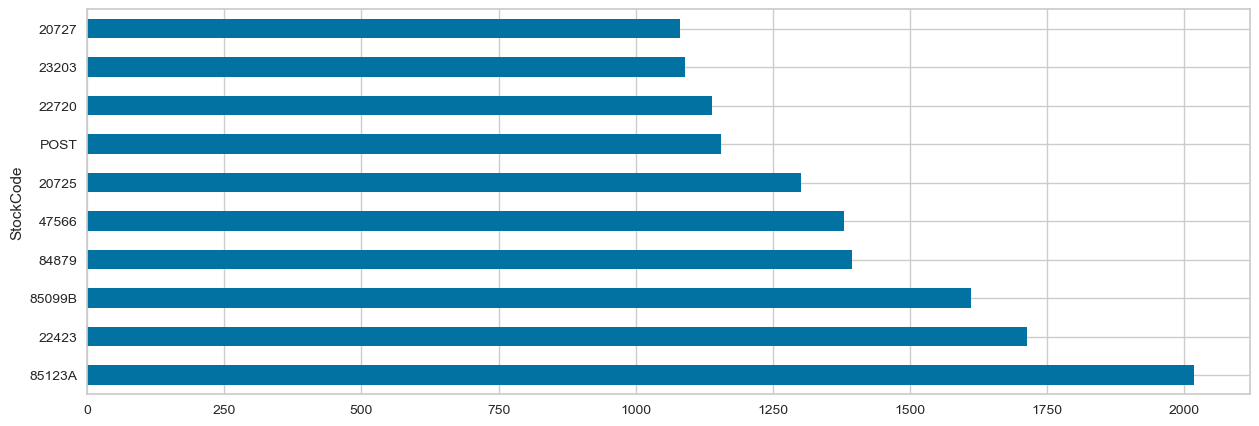

In [31]:
print(f"Number of unique stock codes: {transaction_df.StockCode.nunique()}")
transaction_df.StockCode.value_counts().sort_values(ascending=False).head(10).plot(kind="barh", figsize=(15, 5))

There are a total of over 3600 different stock types. It is, however, observable that there are two types of stock types - one that is composed out of Numbers and letters, while others (e.g. POST or Manual) don't. The latter type might represent services rather than actual products.

In [32]:
pd.Series(transaction_df.StockCode.unique()).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

5    3630
0       7
1       1
Name: count, dtype: int64

Here, I can see that there are 3645 stock codes with 5 numeric characters, 5 with 0 and 1 with 1. I want to take a quick look at the latter two cases:

In [33]:
# get the StockCode with only 0 or 1 numeric characters
transaction_df.loc[transaction_df['StockCode'].astype(str).apply(lambda x: sum(c.isdigit() for c in x)).isin([0, 1]), "StockCode"].value_counts()

StockCode
POST            1155
M                399
C2               132
D                 77
CRUK              16
DOT               16
BANK CHARGES      12
PADS               3
Name: count, dtype: int64

As I mentioned before, those stock codes most likely represent services rather than products (assumption!). Further, they only account for a very small portion of the entire dataset. As the challenge is only product and not service related, I should remove those rows that contain one of the above listed stock codes, in order to fullfill the metric **Relevance**.

In [34]:
transaction_df = transaction_df[~transaction_df["StockCode"].astype(str).apply(lambda x: sum(c.isdigit() for c in x)).isin([0, 1])]

After this cleaning, I can again look at the pattern in the column `Quantity`.

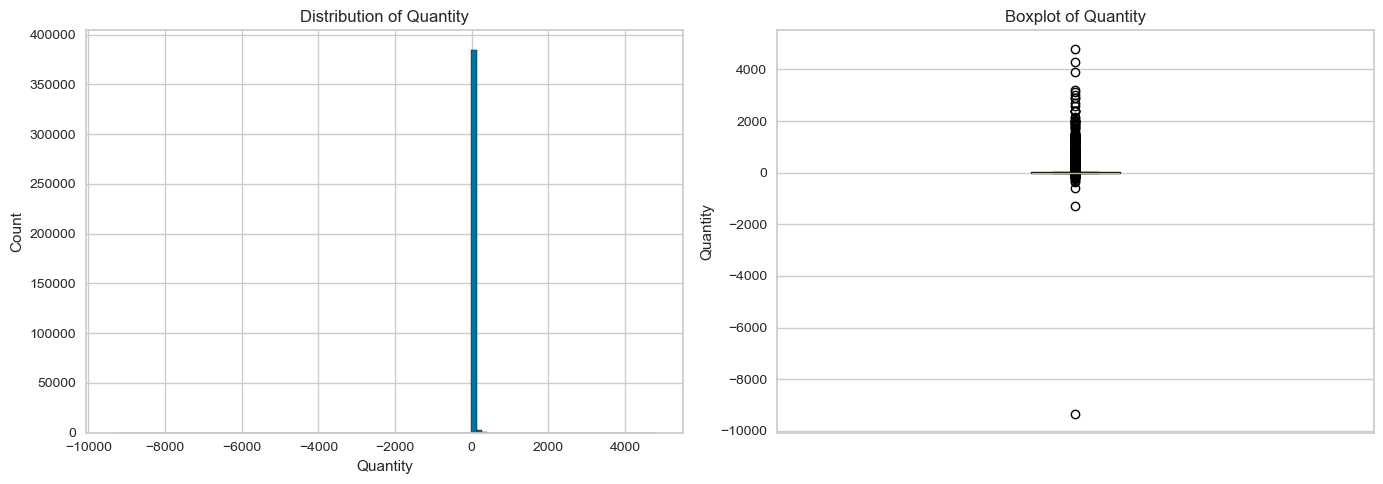

In [35]:
# Set up the matplotlib figure and axes for 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for entry age distribution
axes[0].hist(transaction_df["Quantity"], bins=100, edgecolor='black')
axes[0].set_xlabel("Quantity")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Quantity")

# Plot boxplot
boxplot_dict = axes[1].boxplot(transaction_df["Quantity"], patch_artist=True, vert=True)

# Set title and labels for boxplot
axes[1].set_title("Boxplot of Quantity")
axes[1].set_ylabel("Quantity")
axes[1].set_xticks([])

plt.tight_layout()  # Adjust layout to make room for the plots
plt.show()

Even though I did not yet look at outliers (and actually dont want to look at outliers at that stage, because I am still looking at the time series data), I can immediately tell that I should remove this one single point with an extreme negative Quantity.

In [36]:
# Drop row with most negative Quantity
transaction_df = transaction_df.drop(transaction_df[transaction_df["Quantity"] == transaction_df["Quantity"].min()].index)

In [37]:
transaction_df.nlargest(10, "Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
303048,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom,0
141109,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom,0
60814,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087,United Kingdom,0
185756,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609,United Kingdom,0
107972,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749,United Kingdom,0
312852,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308,United Kingdom,0
3644,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754,United Kingdom,0
200759,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2011-08-04 18:06:00,1.45,12931,United Kingdom,0
137582,554272,21977,PACK OF 60 PINK PAISLEY CAKE CASES,2700,2011-05-23 13:08:00,0.42,12901,United Kingdom,0
49100,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,16333,United Kingdom,0


I can still observe very extreme positive quantity values. But I can also see that the unit price is very low for them. Thus, those values are not necessarily wrong. Lets look at the `UnitPrice`.

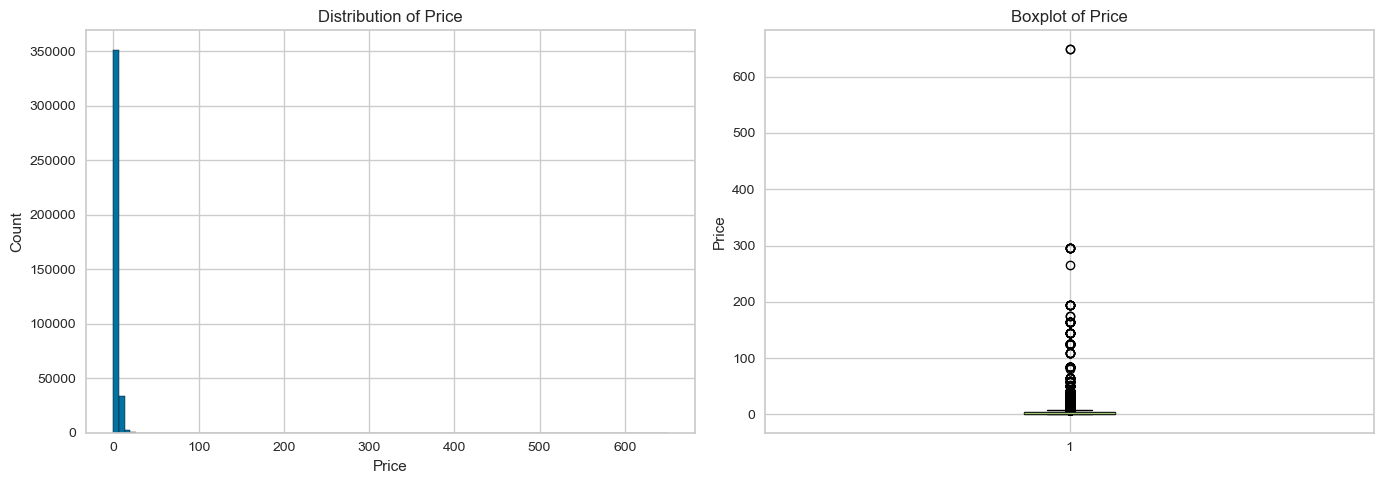

In [38]:
# Set up the matplotlib figure and axes for 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for entry age distribution
axes[0].hist(transaction_df["UnitPrice"], bins=100, edgecolor='black')
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Price")

# Plot boxplot
boxplot_dict = axes[1].boxplot(transaction_df["UnitPrice"], patch_artist=True, vert=True)

# Set title and labels for boxplot
axes[1].set_title("Boxplot of Price")
axes[1].set_ylabel("Price")

plt.tight_layout()  # Adjust layout to make room for the plots
plt.show()

In [39]:
transaction_df.nlargest(10, "UnitPrice")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
152986,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098,United Kingdom,0
152994,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.5,15098,United Kingdom,0
3688,536835,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.0,13145,United Kingdom,0
31580,540647,22655,VINTAGE RED KITCHEN CABINET,1,2011-01-10 14:57:00,295.0,17406,United Kingdom,0
76585,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-14 11:38:00,295.0,13452,United Kingdom,0
87616,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-25 14:19:00,295.0,13452,United Kingdom,0
114784,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-04-28 12:22:00,295.0,14973,United Kingdom,0
140786,554836,22655,VINTAGE RED KITCHEN CABINET,1,2011-05-26 16:25:00,295.0,13015,United Kingdom,0
31668,C540652,22655,VINTAGE RED KITCHEN CABINET,-1,2011-01-10 15:04:00,265.5,17406,United Kingdom,1
70875,545698,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-03-06 14:44:00,195.0,15572,United Kingdom,0


Both, `UnitPice` and `Quantity`, have a large range of values. Yet, all those values are still in a reasonable range. Thus, I assume that the **correctness** in those columns is now given. 

Instead of looking at those columns seperately, I can also compute the total price by simply multiplying them.

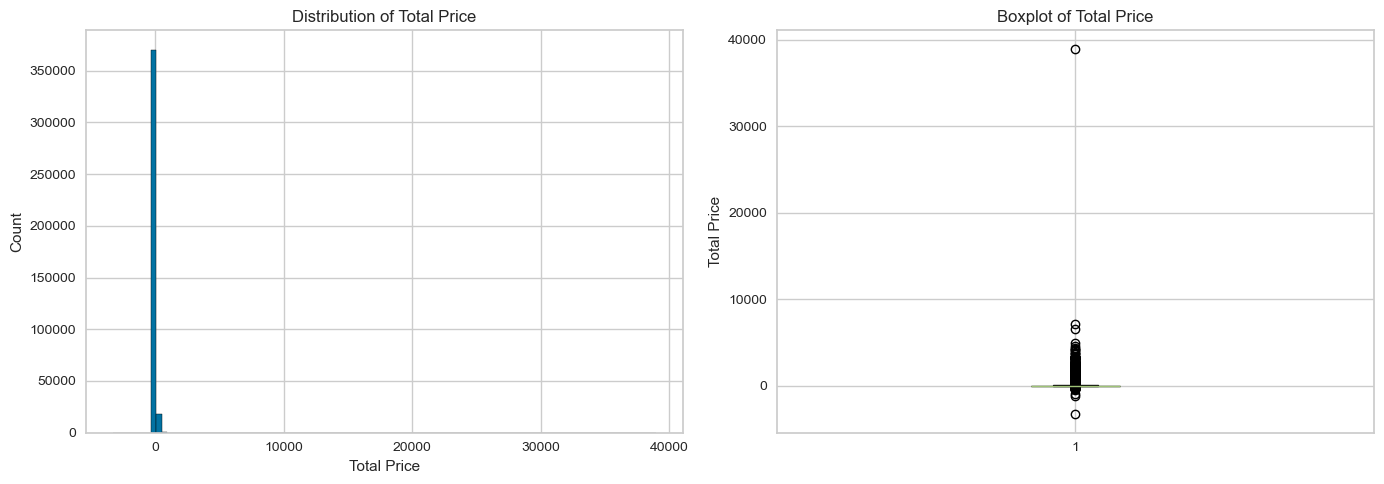

In [40]:
transaction_df["TotalPrice"] = transaction_df["Quantity"] * transaction_df["UnitPrice"]

# Set up the matplotlib figure and axes for 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for entry age distribution
axes[0].hist(transaction_df["TotalPrice"], bins=100, edgecolor='black')
axes[0].set_xlabel("Total Price")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Total Price")

# Plot boxplot
boxplot_dict = axes[1].boxplot(transaction_df["TotalPrice"], patch_artist=True, vert=True)

# Set title and labels for boxplot
axes[1].set_title("Boxplot of Total Price")
axes[1].set_ylabel("Total Price")

plt.tight_layout()  # Adjust layout to make room for the plots
plt.show()

There is again one single extreme outlier that skews the entire data. As this is only one instance, this implies that it is either wrong data or really an exeption. Thus, I can safely remove it. This removal, however, won't change the fact that the data for `TotalPrice`, just as for `Quantity`, is heavily right skewed, meaning that the vast majority of items sold are sold at a low quantity and low total price. This is then also the final adjustment I make regarding the metric **consistency**.

In [41]:
# remove row with largest TotalPrice
transaction_df = transaction_df[transaction_df["TotalPrice"] != transaction_df["TotalPrice"].max()]

Next, I want to know where all the customers are coming from.

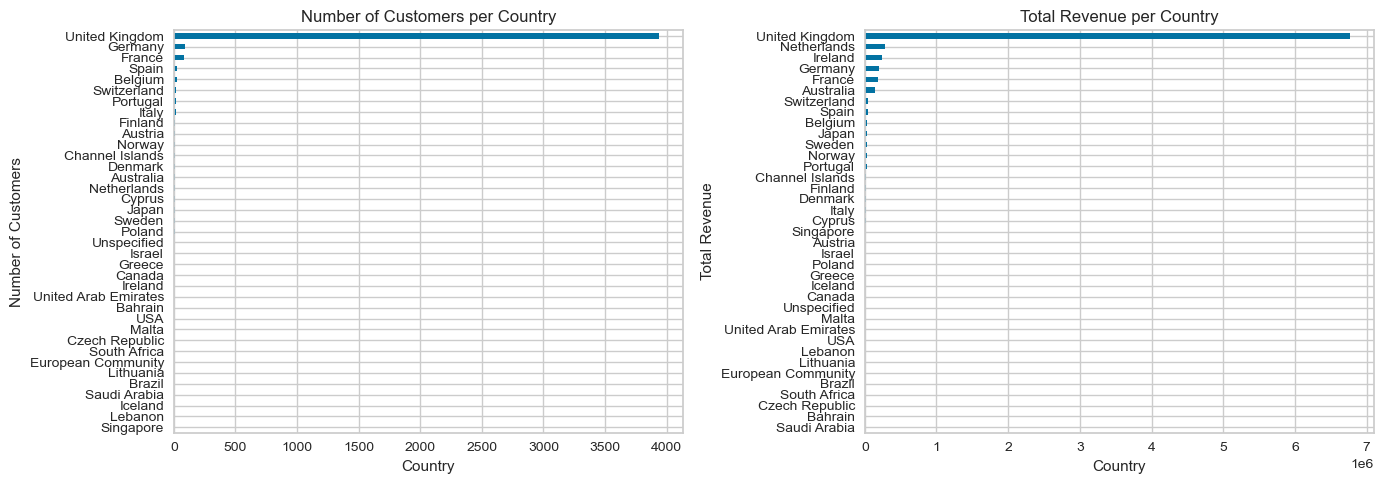

In [42]:
# replace EIRE with Ireland and RSA with South Africa
transaction_df["Country"] = transaction_df["Country"].replace({"EIRE": "Ireland", "RSA": "South Africa"})

# plotting them next to each other and horizontally
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
transaction_df.groupby("Country")["CustomerID"].nunique().sort_values(ascending = True).plot(kind="barh", ax=axes[0])
axes[0].set_title("Number of Customers per Country")
axes[0].set_ylabel("Number of Customers")
axes[0].set_xlabel("Country")
transaction_df.groupby("Country")["TotalPrice"].sum().sort_values(ascending = True).plot(kind="barh", ax=axes[1])
axes[1].set_title("Total Revenue per Country")
axes[1].set_ylabel("Total Revenue")
axes[1].set_xlabel("Country")
plt.tight_layout()
plt.show()

The customers are from 35 different countries (+ European Community + Undefined) from all over the world. Most of the customers are from the United Kingdom, followed by Germany and France. Revenuewise, however, the Netherlands, Ireland, Germany, France, and Australia (in that order) are behind the UK.

Now, I would like to know how many orders are made by the customers

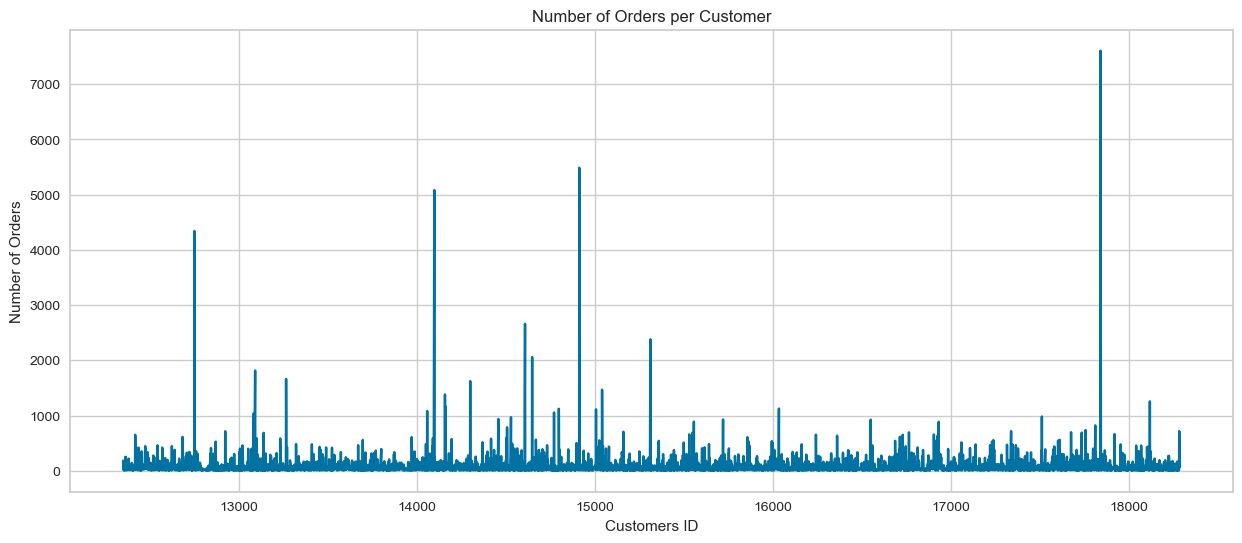

In [43]:
transactions_per_customer = transaction_df.groupby("CustomerID", as_index=False)["InvoiceNo"].count()

plt.figure(figsize=(15, 6))
plt.plot(transactions_per_customer.CustomerID, transactions_per_customer.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Customer')
plt.show()

In [44]:
transactions_per_customer.describe()

,CustomerID,InvoiceNo
count,4353.000000,4353.000000
mean,15302.745922,89.358374
std,1720.239238,222.701812
min,12347.000000,1.000000
25%,13819.000000,17.000000
50%,15303.000000,40.000000
75%,16778.000000,97.000000
max,18287.000000,7604.000000


In [45]:
transactions_per_customer.sort_values("InvoiceNo", ascending=False).head(10)

,CustomerID,InvoiceNo
4025,17841,7604
1884,14911,5485
1290,14096,5081
324,12748,4340
1663,14606,2660
2181,15311,2378
1692,14646,2058
562,13089,1815
690,13263,1662
1437,14298,1623


On average, each customer make around 90 orders. Obviously, there are also one-time customers, but also customers that make many orders. By far the most orders makes the customer with the ID 17841, with 7,604 oders.

Next to the number of orders, I could also look at the revenue made per customer.

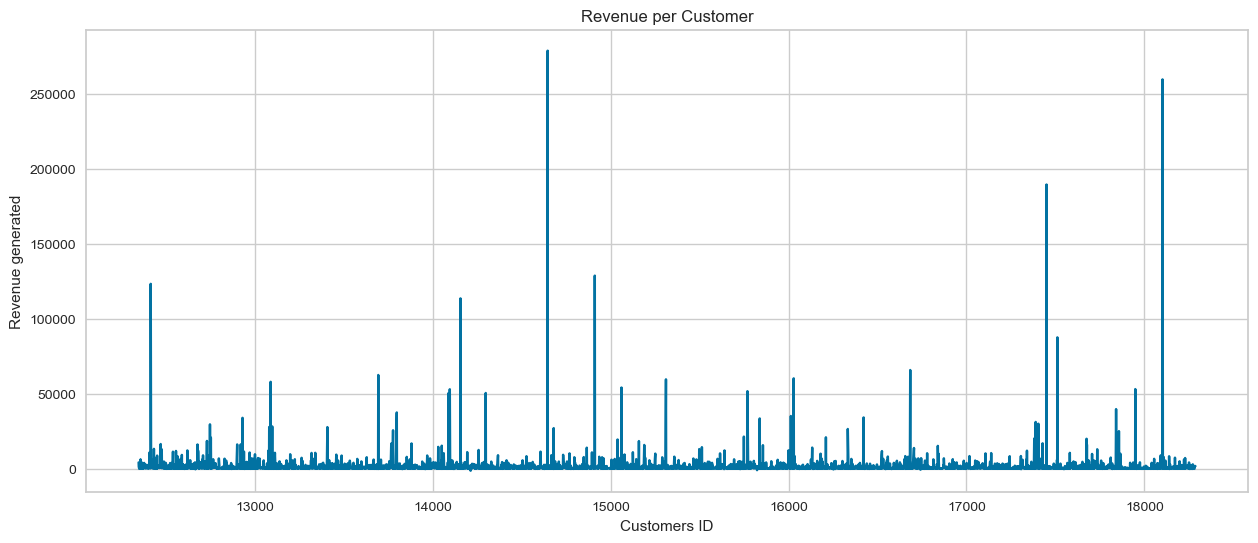

In [46]:
revenue_per_customer = transaction_df.groupby("CustomerID", as_index=False)["TotalPrice"].sum()

plt.figure(figsize=(15, 6))
plt.plot(revenue_per_customer.CustomerID, revenue_per_customer.TotalPrice)
plt.xlabel('Customers ID')
plt.ylabel('Revenue generated')
plt.title('Revenue per Customer')
plt.show()

In [47]:
revenue_per_customer.describe()

,CustomerID,TotalPrice
count,4353.000000,4353.000000
mean,15302.745922,1889.437512
std,1720.239238,8256.783430
min,12347.000000,-1192.200000
25%,13819.000000,292.700000
50%,15303.000000,641.550000
75%,16778.000000,1586.810000
max,18287.000000,278778.020000


In [48]:
revenue_per_customer.sort_values("TotalPrice", ascending=False).head(10)

,CustomerID,TotalPrice
1692,14646,278778.02
4215,18102,259657.30
3741,17450,189575.53
1884,14911,128835.60
54,12415,123368.78
1335,14156,113677.37
3784,17511,87688.58
3188,16684,65920.12
996,13694,62614.74
2708,16029,60369.93


On average, each customer brings in a revenue of around 1,940 units. This value, however, ranges from only 2.9 units up to almost 280k. The customer with the ID 4000, who made the most orders, is not in the top 10 of customers that bring most values. This table is led by the customer with the id 1682.

Moving away from the customer level, it could be very interesting to look at patterns in the time. For that, I firstly create additional columns `YearMonth`, `Weekday`, and `Hour`. Note that I do not make two seperate columns, one for year and one for month, because the dataset starts in December 2010 and ends in December 2011.

In [49]:
# Creating a new column for the year
transaction_df["YearMonth"] = transaction_df["InvoiceDate"].dt.strftime('%b_%y')

# Creating a new column for the day
transaction_df["Weekday"] = transaction_df["InvoiceDate"].dt.day_name()

# Creating a new column for the hour
transaction_df["Hour"] = transaction_df["InvoiceDate"].dt.hour

Now I can look if I can find some patterns in the time-related data.

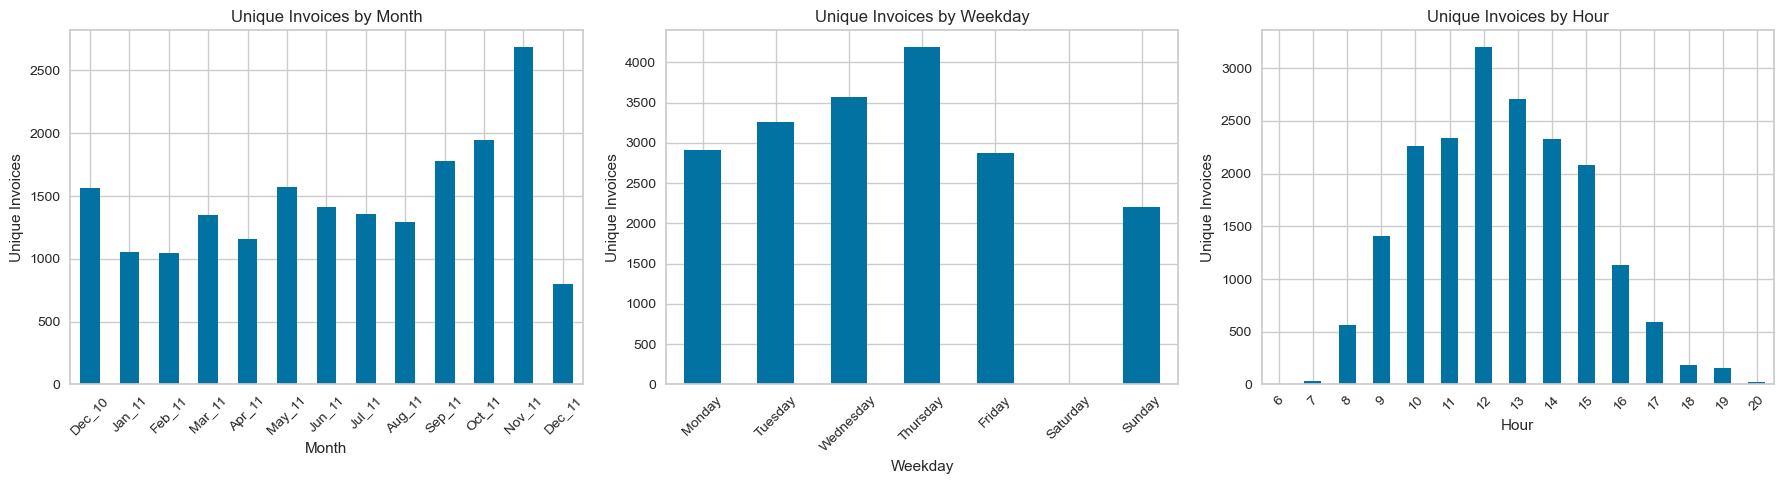

In [50]:
# Define the order of the bars
YearMonth_order = ["Dec_10", "Jan_11", "Feb_11", "Mar_11", "Apr_11", "May_11", "Jun_11", "Jul_11", "Aug_11", "Sep_11", "Oct_11", "Nov_11", "Dec_11"]
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create a figure and a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Unique Invoices by YearMonth
transaction_df.groupby("YearMonth")["InvoiceNo"].nunique().reindex(YearMonth_order).plot(kind="bar", ax=axes[0])
axes[0].set_title('Unique Invoices by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Unique Invoices')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Unique Invoices by Weekday
transaction_df.groupby("Weekday")["InvoiceNo"].nunique().reindex(weekday_order, fill_value=0).plot(kind="bar", ax=axes[1])
axes[1].set_title('Unique Invoices by Weekday')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Unique Invoices')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Unique Invoices by Hour
transaction_df.groupby("Hour")["InvoiceNo"].nunique().plot(kind="bar", ax=axes[2])
axes[2].set_title('Unique Invoices by Hour')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Unique Invoices')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The monthly data shows fluctuations with the highest activity in November 2011, the weekly shows a peak on Thursday, and the hourly peaks at noon, with no data for Saturdays, probably due to closure.

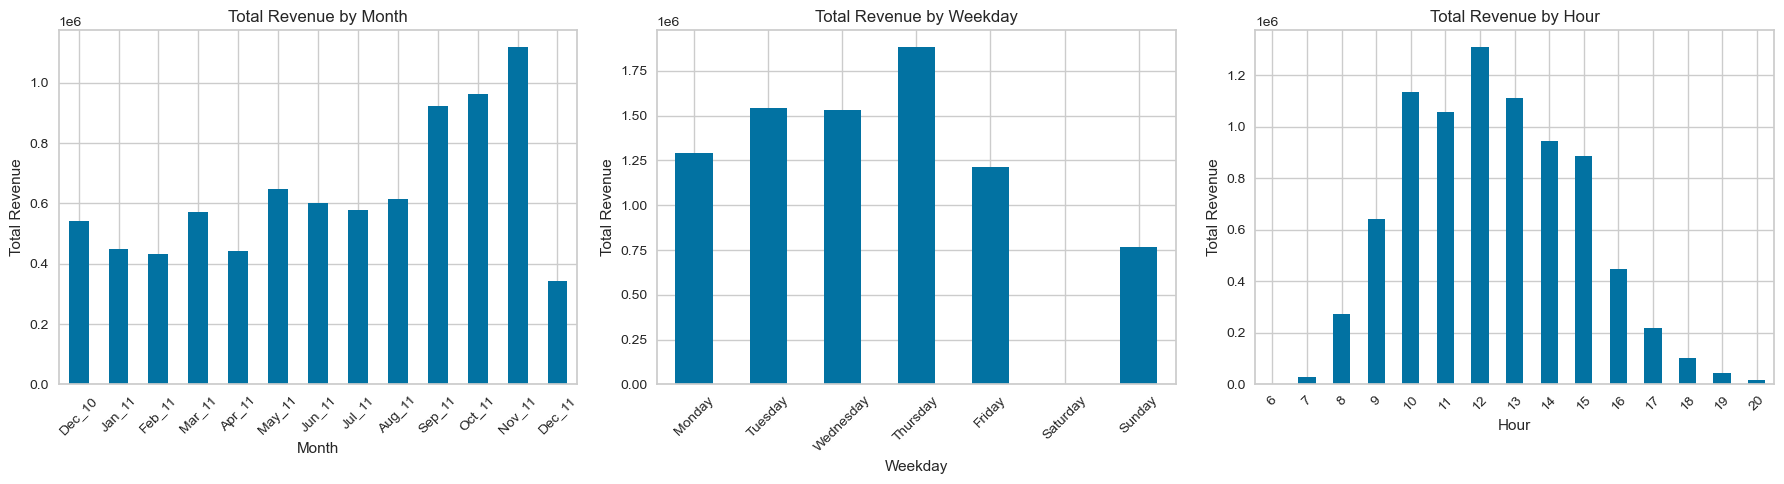

In [51]:
# Create a figure and a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Total Revenue by YearMonth
transaction_df.groupby("YearMonth")["TotalPrice"].sum().reindex(YearMonth_order).plot(kind="bar", ax=axes[0])
axes[0].set_title('Total Revenue by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Revenue')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Total Revenue by Weekday
transaction_df.groupby("Weekday")["TotalPrice"].sum().reindex(weekday_order, fill_value=0).plot(kind="bar", ax=axes[1])
axes[1].set_title('Total Revenue by Weekday')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Total Revenue')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Total Revenue by Hour
transaction_df.groupby("Hour")["TotalPrice"].sum().plot(kind="bar", ax=axes[2])
axes[2].set_title('Total Revenue by Hour')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Total Revenue')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The revenue plots show a similar picture to the number of order-plots.

<u>**Metrics to measure the data quality**</u>

• *Completeness*:
There are no missing values ✅<br><br>
• *Consistency*:
I did not yet check for outliers. This, however, was on purpose, as I will now proceed with creating features. After that, I will look at this metric again. ❓<br><br>
• *Correctness*:
I cannot check this to 100%, but the data ranges, etc. seem to make sense. In order to properly evaluate this metric I need to talk to the business expert (✅)<br><br>
• *Uniqueness*:
There are no duplicates in the data that I dont want (note: it is time-series data, so there are duplicates in each columns, but this is more than fine) ✅<br><br>
• *Timeliness*:
This data ends in December, 2011. I, however, assume that this analysis is for the end of 2011/ beginning 2012 (#timetravel). Thus, this is okay ✅<br><br>
• *Stability*:
This is given (assumption) ✅<br><br>
• *Relevance*:
I mentinoed the metric relevance multiple times in my EDA. The data given is relevant, but for the following anaylsis, I need to transform the time series to tabular data. Thus, this metric is not yet fullfilled. (✅)<br><br>
• *Contextualization*:
Looking at the describtion of the challenge and task, this seems to be fullfilled ✅<br><br>
• *Trustworthiness*:
Here, I assume that the data can be trusted based on the reputation of the stakeholders involved in data acquisition ✅

##### Customer_df

In order to fullfill the metric **relevance** I will now create a tabular dataframe. I will create the following features:

- `DaysSinceLastPurchase`: The number of days from the customer's last purchase to the current date (max date in the dataset).

- `TotalOrders`: The total number of orders placed by the customer.

- `TotalRevenue`: The total revenue generated from the customer's purchases.

- `AverageQuantity`: The average quantity of products purchased per order by the customer.

- `StdQuantity`: The standard deviation of the quantity of products purchased per order by the customer.

- `UniqueProducts`: The number of unique products purchased by the customer.

- `AvgDaysBetweenPurchases`: The average number of days between consecutive purchases by the customer.

- `IsUK`: Indicates whether the customer is from the United Kingdom (1 for yes, 0 for no).

- `CancelledTransactions`: The total number of transactions that were canceled by the customer.

In [52]:
# create a new dataframe with the first and last purchase date for each customer
customer_df = transaction_df.groupby("CustomerID", as_index=False).agg({"InvoiceDate": ['max']}).droplevel(0, axis=1)
customer_df.columns = ["CustomerID", "MaxInvoiceDate"]

# Calculate the number of days since the last purchase
customer_df["DaysSinceLastPurchase"] = (transaction_df.InvoiceDate.max() - customer_df["MaxInvoiceDate"]).dt.days

# Drop the MinInvoiceDate and MaxInvoiceDate columns
customer_df = customer_df.drop(columns=["MaxInvoiceDate"])

# Total number of orders
orders_per_customer = transaction_df.groupby("CustomerID")["InvoiceNo"].nunique()
customer_df = customer_df.merge(orders_per_customer.rename('TotalOrders'), left_on='CustomerID', right_index=True, how='left')

# Total revenue
total_revenue = transaction_df.groupby("CustomerID")["TotalPrice"].sum()
customer_df = customer_df.merge(total_revenue.rename('TotalRevenue'), left_on='CustomerID', right_index=True, how='left')

# Average quantity of products purchased
avg_quantity = transaction_df.groupby("CustomerID")["Quantity"].mean()
customer_df = customer_df.merge(avg_quantity.rename('AverageQuantity'), left_on='CustomerID', right_index=True, how='left')

# Standard deviation of quantity of products purchased
std_quantity = transaction_df.groupby("CustomerID")["Quantity"].std()
customer_df = customer_df.merge(std_quantity.rename('StdQuantity'), left_on='CustomerID', right_index=True, how='left')

# Number of unique products purchased
unique_products = transaction_df.groupby("CustomerID")["Description"].nunique()
customer_df = customer_df.merge(unique_products.rename('UniqueProducts'), left_on='CustomerID', right_index=True, how='left')

# Average days between purchases
avg_days = transaction_df.groupby('CustomerID')['InvoiceDate'].apply(lambda x: x.diff().dt.days.dropna().mean())
customer_df = customer_df.merge(avg_days.rename('AvgDaysBetweenPurchases'), left_on='CustomerID', right_index=True, how='left')
customer_df["AvgDaysBetweenPurchases"] = customer_df["AvgDaysBetweenPurchases"].fillna(0)

# Country of the customer (binary, i.e., 1 if customer is from UK, 0 otherwise)
is_uk = transaction_df.groupby("CustomerID")["Country"].first().apply(lambda x: 1 if x == "United Kingdom" else 0)
customer_df = customer_df.merge(is_uk.rename('IsUK'), left_on='CustomerID', right_index=True, how='left')

# Number of transactions cancelled
cancelled_transactions = transaction_df[transaction_df["Cancelled"] == 1].groupby("CustomerID")["InvoiceNo"].nunique()
customer_df = customer_df.merge(cancelled_transactions.rename('CancelledTransactions'), left_on='CustomerID', right_index=True, how='left')
customer_df["CancelledTransactions"] = customer_df["CancelledTransactions"].fillna(0)

customer_df

,CustomerID,DaysSinceLastPurchase,TotalOrders,TotalRevenue,AverageQuantity,StdQuantity,UniqueProducts,AvgDaysBetweenPurchases,IsUK,CancelledTransactions
0,12347,1,7,4310.00,13.505495,18.856172,103,2.000000,0,0.0
1,12348,74,4,1437.24,86.370370,45.421232,21,10.846154,0,0.0
2,12349,18,1,1457.55,8.750000,6.972279,72,0.000000,0,0.0
3,12350,309,1,294.40,12.250000,3.492850,16,0.000000,0,0.0
4,12352,35,6,1265.41,6.614286,4.348223,57,3.739130,0,0.0
...,...,...,...,...,...,...,...,...,...,...
4348,18280,277,1,180.60,4.500000,1.900292,10,0.000000,1,0.0
4349,18281,180,1,80.82,7.714286,5.056820,7,0.000000,1,0.0
4350,18282,7,2,176.60,8.166667,11.487806,12,10.727273,1,0.0
4351,18283,3,16,2036.69,1.885794,1.565241,270,0.456067,1,0.0


Now, that I created this "new" dataset, the metric **relevance** is definitely given as well. I quickly check **completeness**, **uniqueness**, and **consistency** (outlier) for this new dataset. The other metrics are given due to the fact that it is based on the dataset, for which I already checked everything.

**Completeness**:

In [53]:
# check for missing values
customer_df.isna().sum()

CustomerID                  0
DaysSinceLastPurchase       0
TotalOrders                 0
TotalRevenue                0
AverageQuantity             0
StdQuantity                81
UniqueProducts              0
AvgDaysBetweenPurchases     0
IsUK                        0
CancelledTransactions       0
dtype: int64

In [54]:
customer_df.loc[customer_df.StdQuantity.isna(), "TotalOrders"].value_counts()

TotalOrders
1    81
Name: count, dtype: int64

Here, we have missing values, but those are only from one-time customers. As we do not have enough data about them, we can drop them.

In [55]:
# drop na values
customer_df = customer_df.dropna()

**Uniqueness**:

In [56]:
# check for duplicates
customer_df.duplicated().sum()

0

**Consistency** (outlier):

Focusing on just one feature at a time can sometimes lead us astray, especially when it comes to spotting outliers. That's why I'm leaning towards using the Isolation Forest algorithm. It's quite adept at navigating the complexities of multidimensional spaces to pinpoint outliers. Unlike other methods, Isolation Forest looks at how separated a data point is within its environment. It's particularly good at spotting those data points that stand out because they're less densely packed compared to their neighbors. This approach ensures we're not just looking at the outliers in isolation but understanding their context within the broader dataset.

In [57]:
# isolation forest
isoForestScores = IsolationForest(random_state=42).fit_predict(customer_df.drop(columns=["CustomerID"]))

# Create column "Outlier" that is 1 for outliers and 0 for non-outliers
customer_df["Outlier"] = np.where(isoForestScores == -1, 1, 0)

customer_df

/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_37405/674148985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df["Outlier"] = np.where(isoForestScores == -1, 1, 0)


,CustomerID,DaysSinceLastPurchase,TotalOrders,TotalRevenue,AverageQuantity,StdQuantity,UniqueProducts,AvgDaysBetweenPurchases,IsUK,CancelledTransactions,Outlier
0,12347,1,7,4310.00,13.505495,18.856172,103,2.000000,0,0.0,0
1,12348,74,4,1437.24,86.370370,45.421232,21,10.846154,0,0.0,1
2,12349,18,1,1457.55,8.750000,6.972279,72,0.000000,0,0.0,0
3,12350,309,1,294.40,12.250000,3.492850,16,0.000000,0,0.0,0
4,12352,35,6,1265.41,6.614286,4.348223,57,3.739130,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
4348,18280,277,1,180.60,4.500000,1.900292,10,0.000000,1,0.0,0
4349,18281,180,1,80.82,7.714286,5.056820,7,0.000000,1,0.0,0
4350,18282,7,2,176.60,8.166667,11.487806,12,10.727273,1,0.0,0
4351,18283,3,16,2036.69,1.885794,1.565241,270,0.456067,1,0.0,0


Number of outliers: 301
Number of non-outliers: 3971


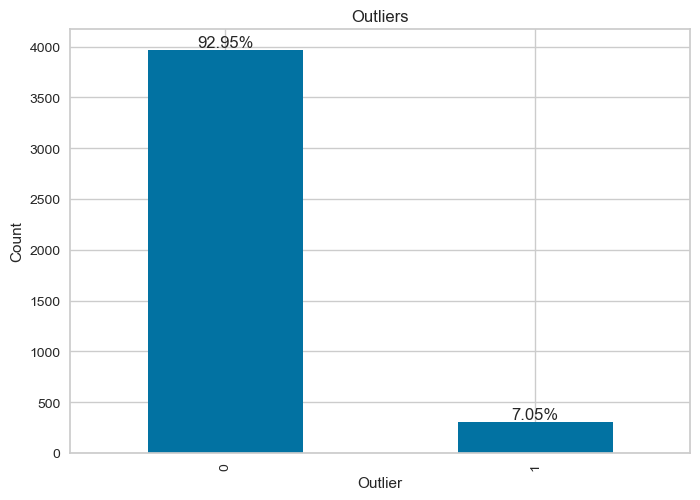

In [58]:
print(f"Number of outliers: {customer_df['Outlier'].sum()}")
print(f"Number of non-outliers: {customer_df.shape[0] - customer_df['Outlier'].sum()}")

# plot histogram of outliers
customer_df["Outlier"].value_counts().plot(kind="bar")
for i in range(2):
    plt.text(i, customer_df["Outlier"].value_counts()[i], f"{customer_df['Outlier'].value_counts()[i] / len(customer_df) * 100:.2f}%", ha='center', va='bottom')
plt.title("Outliers")
plt.xlabel("Outlier")
plt.ylabel("Count")
plt.show()


The IsolationForest detected about 7% (301) of the data to be outliers. As those outliers can significantly affect the process of clustering (customer segmentation), I will remove them. Thus, I am left with almost 4000 columns of data.

In [59]:
# remove outliers
customer_df = customer_df[customer_df["Outlier"] == 0]

# drop the Outlier column
customer_df = customer_df.drop(columns=["Outlier"])

**Now, all the data quality metrics are fullfilled, indicating that I can now start working with a good prepared dataset.**

Before moving on to the modeling part, however, I will need to take look at correlation between my features:

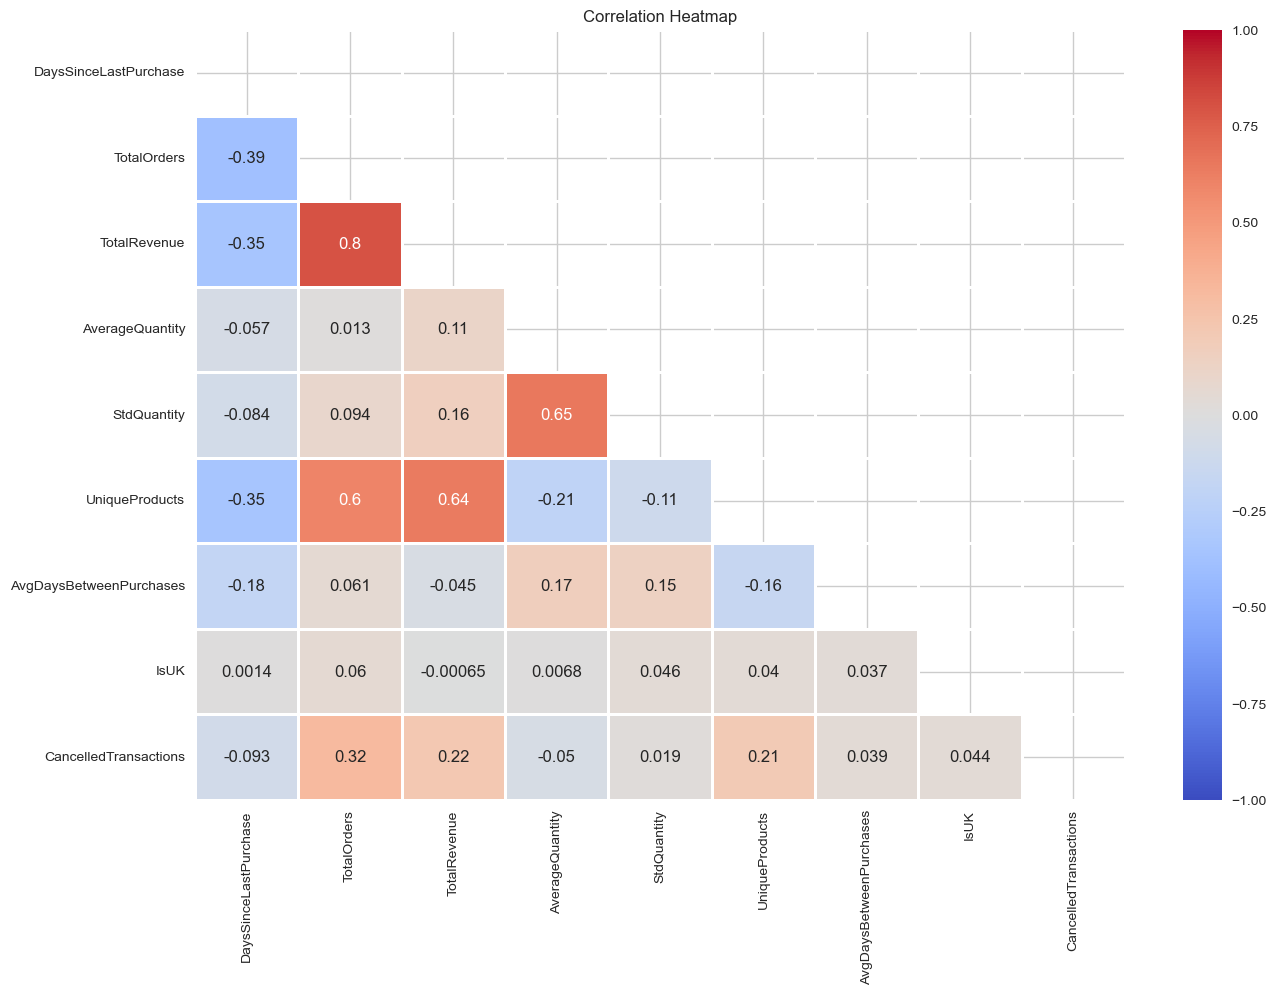

In [60]:
# sparse correlation heatmap
plt.figure(figsize=(15, 10))

customer_df_corr = customer_df.drop(columns="CustomerID").corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(customer_df_corr, dtype=bool))

# Heatmap
sns.heatmap(customer_df_corr, mask = mask, annot=True, cmap="coolwarm", vmin = -1, vmax = 1, linewidths=2)
plt.title("Correlation Heatmap")
plt.show()

From this correlation heatmap, there are a few notable observations:

1. `TotalOrders` and `TotalRevenue` have a strong positive correlation (0.8), indicating that as customers order more frequently their contribution to total revenue also increases.

2. There is a noticeable negative correlation between `DaysSinceLastPurchase` and `TotalOrders` (-0.39), `TotalRevenue` (-0.35), and `UniqueProducts` (-0.35). This suggests that the longer it has been since a customer's last purchase, the fewer orders, unique products, and overall revenue they are associated with, which could imply that recent purchasers are generally more active.

3. `UniqueProducts` shows a moderate positive correlation with `TotalOrders` (0.6) and `TotalRevenue` (0.64), meaning that customers who buy a wider range of products tend to contribute significantly to revenue.

4. `CancelledTransactions` seems to have a modest positive correlation with `TotalOrders` (0.32), which could indicate that customers who place more orders also have a higher number of cancellations, possibly due to a higher volume of transactions presenting more opportunities for cancellations.

5. `AvgDaysBetweenPurchases` has no strong correlation with other variables, suggesting that the frequency of purchase doesn't significantly correlate with other customer behaviors in this dataset.

6. `IsUK` has very low correlation coefficients with all other variables, indicating that whether a customer is from the UK or not doesn’t have a strong linear relationship with the other customer behaviors and attributes measured here.

#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)

FarTrend's dataset reveals that while the majority of orders consist of small quantities, there exists a subset of bulk orders in the thousands, hinting at the presence of both individual consumers and possibly larger wholesale clients or frequent buyers. With prices also generally low, yet some reaching into the hundreds, FarTrend appears to serve a broad market spectrum, from budget-conscious to premium customers. This pricing strategy, coupled with a vast geographical reach — the UK being the major hub — positions FarTrend as a versatile player in the e-commerce arena, capable of catering to a wide range of consumer needs and preferences. However, the larger revenue contributions from countries like the Netherlands and Ireland suggest that targeted marketing strategies could be developed to further penetrate these high-value regions.

The customer behavioral analysis underscores the fact that frequent shoppers do not necessarily equate to the highest revenue generators, a crucial insight for FarTrend's marketing efforts: although the customer with the highest number of orders (ID 17841 with 7,604 orders) places many orders, they do not appear among the top ten revenue-generating customers. Conversely, the leading revenue contributor (customer with ID 1682) is not the one who made the most orders. This highlights the potential for upselling and cross-selling to regular customers, like those exemplified by customer ID 17841. Meanwhile, the customer with ID 1682 leading in revenue generation, despite fewer orders, suggesting they may make bulk purchases or buy high-value items. Understanding these patterns enables FarTrend to personalize marketing campaigns, focus on customer retention, and adjust stock levels according to buying habits. Seasonal trends, like the November peak and weekday timings, offer opportunities for timed promotions and campaigns. By leveraging these insights with the predictive model, FarTrend can anticipate and shape new customer purchasing behaviors, driving both satisfaction and revenue.

## Question 2: Segment the clients based on their purchase profile (35 points)

In this task I will implement and compare two clustering algorithms, KMeans and Agglomerative Clustering. Both rely heavily on distance, which makes the scale of the features crucial. In both algorithms, without proper scaling, the resulting clusters might reflect the discrepancies in feature scale rather than the inherent structure of the data. Thus, the first step is scaling.

Note: The columns `CustomerID` and `IsUK` don't need to be scaled. `CustomerID` simply acts as an identifier for the customer, i.e. is not really a feature of the model, and `IsUK` is binary.

In [61]:
# create new dataframe with (soon to be) scaled values
customer_df_scaled = customer_df.copy()

# create a StandardScaler object
scaler = StandardScaler()

# columns to scale  
columns_to_scale = customer_df_scaled.columns[~customer_df_scaled.columns.isin(["CustomerID", "IsUK"])]

# fit and transform the data
customer_df_scaled[columns_to_scale] = scaler.fit_transform(customer_df_scaled[columns_to_scale])

# putting CustomerID in the index
customer_df_scaled.set_index('CustomerID', inplace=True)

customer_df_scaled

,DaysSinceLastPurchase,TotalOrders,TotalRevenue,AverageQuantity,StdQuantity,UniqueProducts,AvgDaysBetweenPurchases,IsUK,CancelledTransactions
CustomerID,,,,,,,,,
12347,-0.912868,0.955037,2.274932,0.157786,0.711938,0.755349,-0.122483,0,-0.281643
12349,-0.740878,-0.701297,0.238104,-0.240578,-0.318232,0.247655,-0.557611,0,-0.281643
12350,2.203173,-0.701297,-0.592458,0.052614,-0.619851,-0.669470,-0.557611,0,-0.281643
12352,-0.568889,0.678982,0.100904,-0.419485,-0.545702,0.001996,0.255890,0,-0.281643
12353,1.130770,-0.701297,-0.739126,-0.554713,-0.698810,-0.865997,-0.557611,0,-0.281643
...,...,...,...,...,...,...,...,...,...
18280,1.879429,-0.701297,-0.673718,-0.596597,-0.757903,-0.767734,-0.557611,1,-0.281643
18281,0.898078,-0.701297,-0.744968,-0.327339,-0.484276,-0.816865,-0.557611,1,-0.281643
18282,-0.852166,-0.425241,-0.676575,-0.289443,0.073202,-0.734979,1.776258,1,-0.281643


Now that I have scaled my features, I can also use dimensionality reduction. Applying dimensionality reduction through PCA after scaling ensures that all features contribute equally to the analysis, allowing us to capture the most significant variance across dimensions with fewer components.

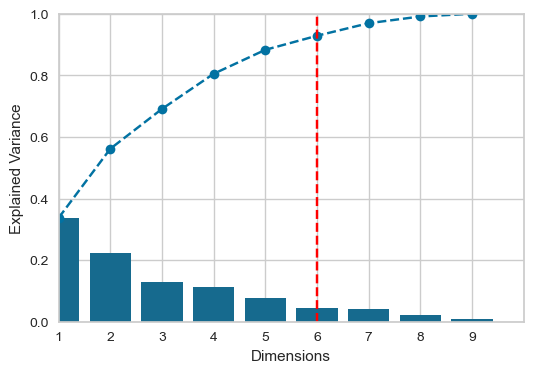

In [62]:
pca = PCA()
pca.fit(customer_df_scaled)
expl_var = pca.explained_variance_ratio_
cumsum = np.cumsum(pca.explained_variance_ratio_)
optimal_k = np.argmax(cumsum >= 0.9) + 1

plt.figure(figsize=(6,4))
# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumsum) + 1)), y=expl_var)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumsum)), cumsum, marker='o', linestyle='--')
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--') 
plt.axis([0, customer_df_scaled.shape[1], 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

Choosing six principal components allows me to retain 95% of the original dataset's variance, effectively compressing our data while preserving most of its informational value. This reduction simplifies my analysis, making subsequent clustering more computationally efficient and potentially more accurate. However, this dimensionality reduction leads to a loss of interpretability, as the principal components represent linear combinations of the original features, making it challenging to understand their direct influence on the data.

In [63]:
pca = PCA(n_components=optimal_k)
customer_df_pca = pca.fit_transform(customer_df_scaled)

# Creating a new dataframe with the PCA components
customer_df_pca = pd.DataFrame(customer_df_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Add the CustomerID column
customer_df_pca.index = customer_df_scaled.index

#### Q2.1 Build a baseline model to segment the costumers. (15 points)

As aforementioned, my baseline model will use the K-Means clustering algorithm. For that the first step is always to find the optimal number of clusters (optimal k). For that there are two very popular methods:
1. Ellbow Method
2. Silhouette Method

I will start with the *Ellbox method*:

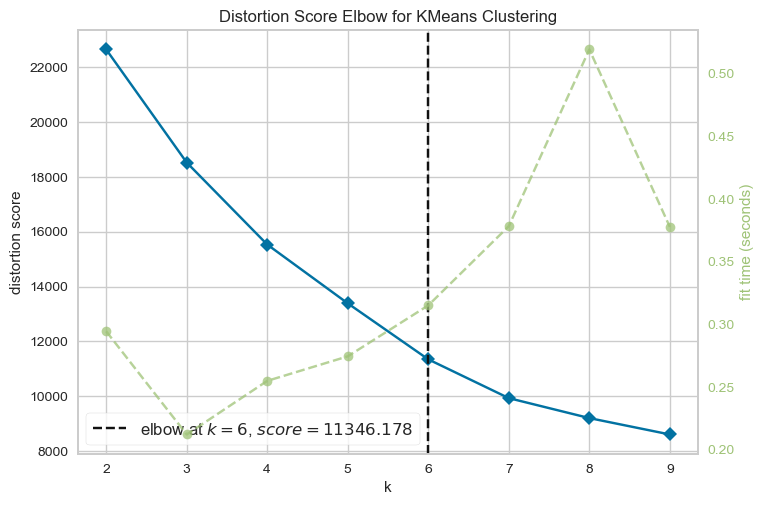

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
# Instantiate the clustering model and visualizer
kmeans = KMeans(random_state=42, n_init=50, max_iter=1000)
visualizer = KElbowVisualizer(kmeans, k=(2,10))

visualizer.fit(customer_df_pca) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

The graph points to k = 6 as the optimal number of clusters for our KMeans analysis, where the benefits of adding more clusters start to diminish. Since the elbow isn't sharply defined, we might explore further with silhouette analysis on the most effective k value under 10.

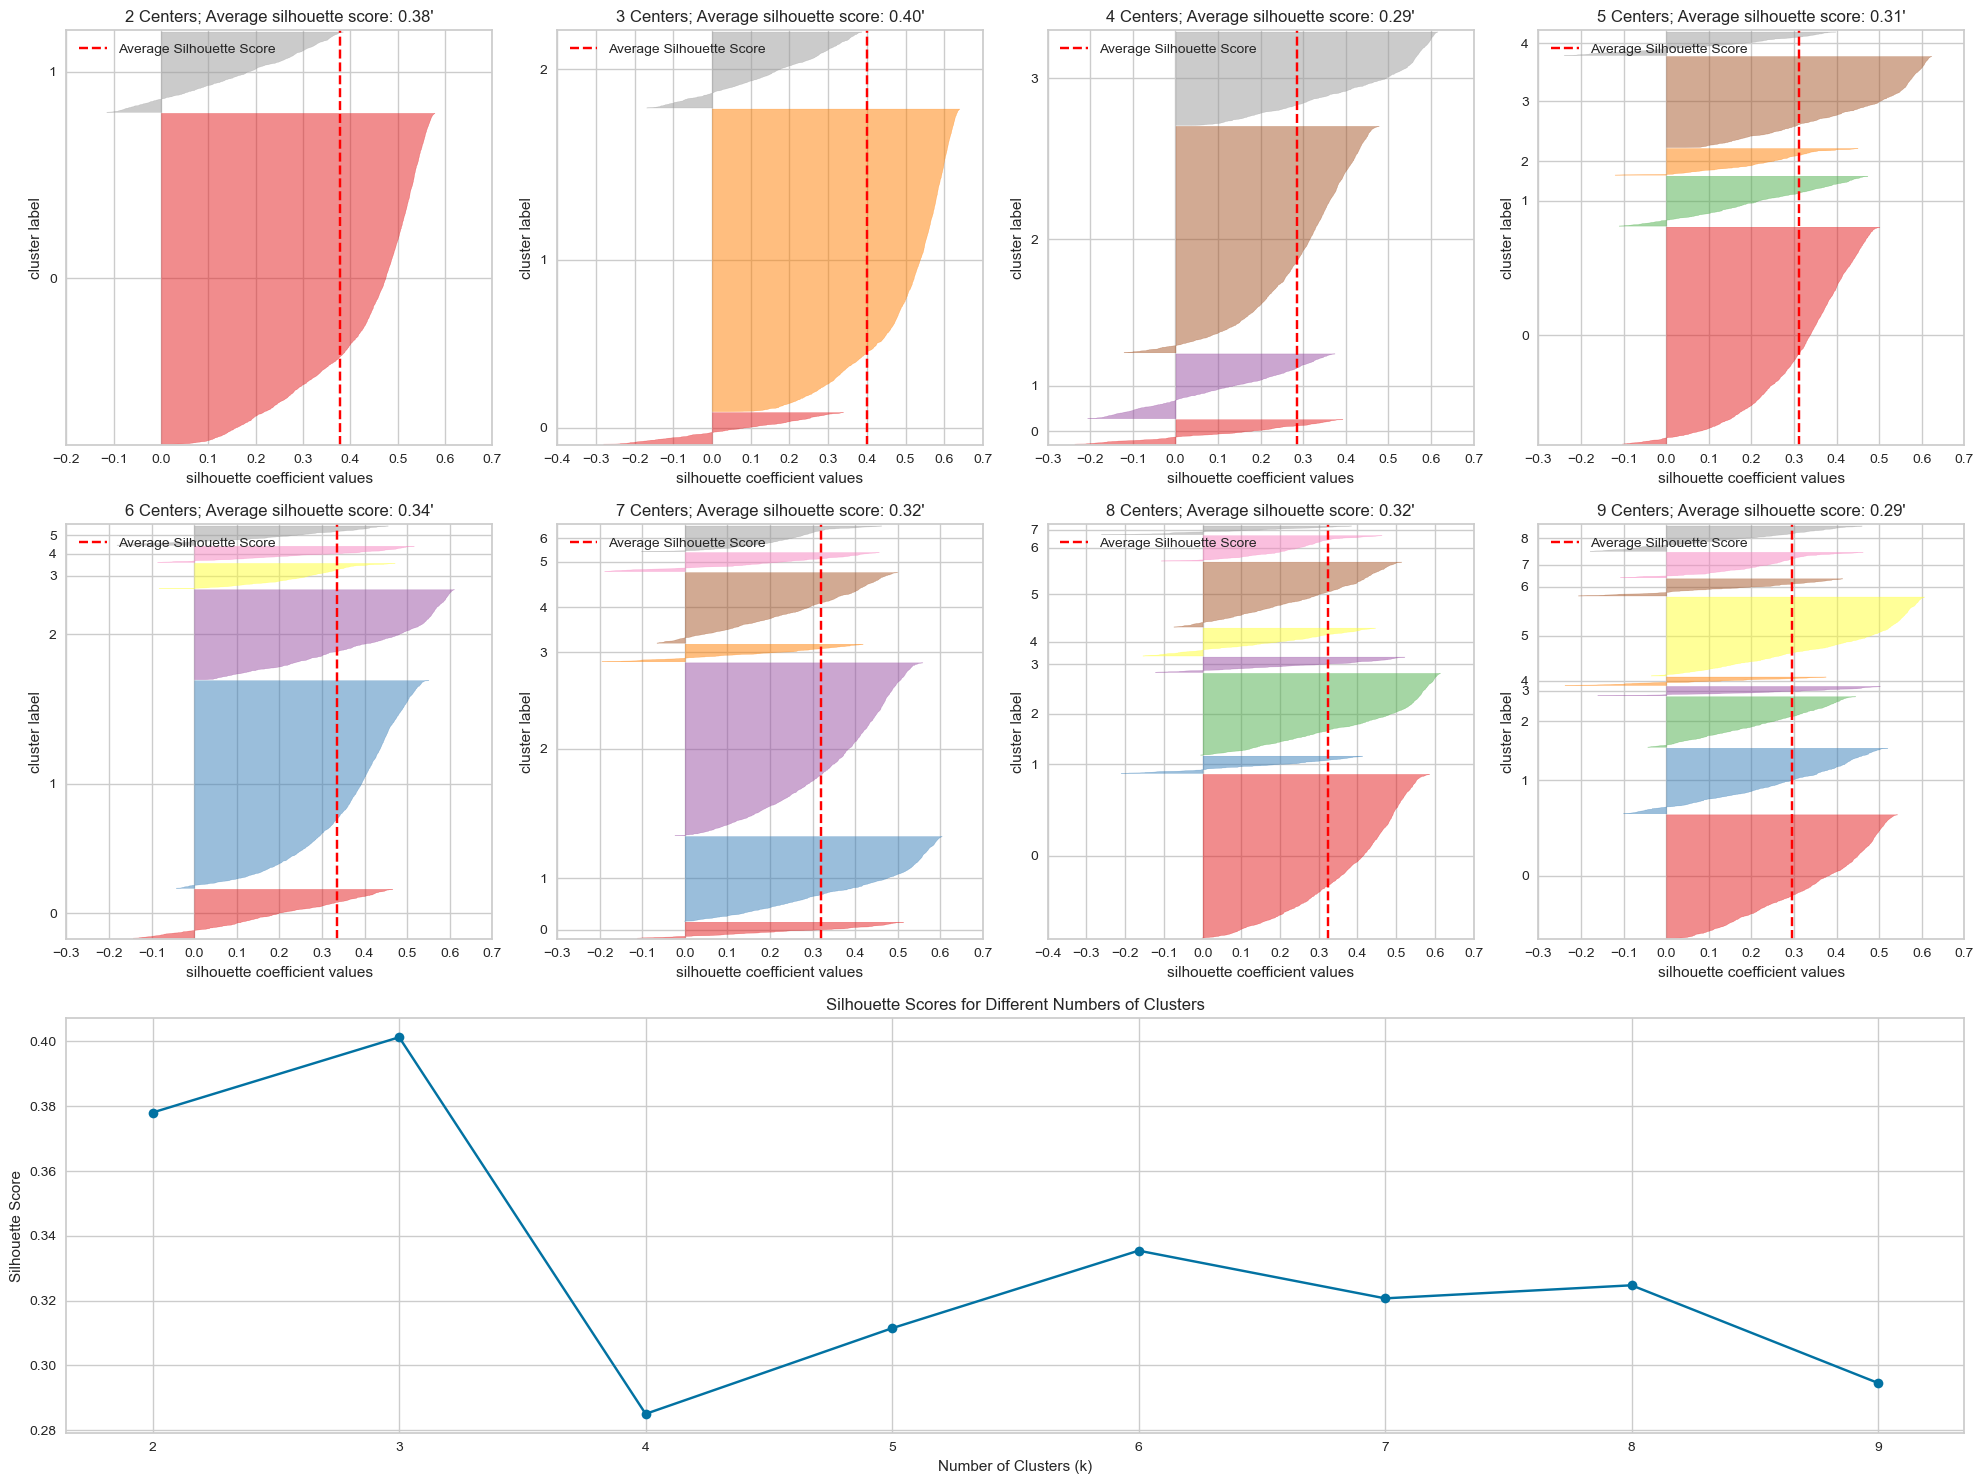

In [65]:
#  Placeholder for silhouette scores
silhouette_scores = []

# Set up figure and grid
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(3, 4, fig)

# First two rows of 4 plots each
for i in range(8):
    # Calculate the row and column index
    row = i // 4
    col = i % 4
    ax = plt.subplot(gs[row, col])

    # Instantiate the KMeans model
    model = KMeans(n_clusters=i+2, random_state=42, n_init=100, max_iter=1000)
    # Instantiate the SilhouetteVisualizer with the KMeans instance
    visualizer = SilhouetteVisualizer(model, ax=ax)
    # Fit the data to the visualizer
    visualizer.fit(customer_df_pca)
    # Append the silhouette score to the list for overall plot
    silhouette_scores.append(visualizer.silhouette_score_)

    #Finalize the figure
    visualizer.finalize()

    # Set the title for the figure
    visualizer.set_title(f"{i+2} Centers; Average silhouette score: {visualizer.silhouette_score_:.2f}'")

# Last row with a single plot
ax_big = plt.subplot(gs[2, :])
ax_big.plot(range(2, 10), silhouette_scores, marker='o')
ax_big.set_title("Silhouette Scores for Different Numbers of Clusters")
ax_big.set_xlabel("Number of Clusters (k)")
ax_big.set_ylabel("Silhouette Score")
ax_big.grid(True)

plt.tight_layout()
plt.show()


The elbow graph suggests k = 6 as a good candidate, while the silhouette scores suggests k = 3. As the silhouette score measures how similar an object is to its own cluster compared to other clusters, it provides a clearer evaluation of clustering performance by considering both cohesion and separation, which is an advantage over the elbow method that primarily focuses on within-cluster variance without directly assessing the separation between clusters. Thus, I opt for k = 3.

In [66]:
# Apply k-means clustering with k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=50, max_iter=1000)
customer_df["KMeans_Cluster"] = kmeans.fit_predict(customer_df_pca)

# calculating the silhouette score
silhouette_score(customer_df_pca, customer_df["KMeans_Cluster"])

0.40129251215821055

A silhouette score of approximately 0.401 suggests that, on average, the clusters formed by the KMeans algorithm are moderately distinct and well separated from each other. This indicates a reasonable structure within the data, although there might be room for improvement in clustering coherence or in selecting the number of clusters.

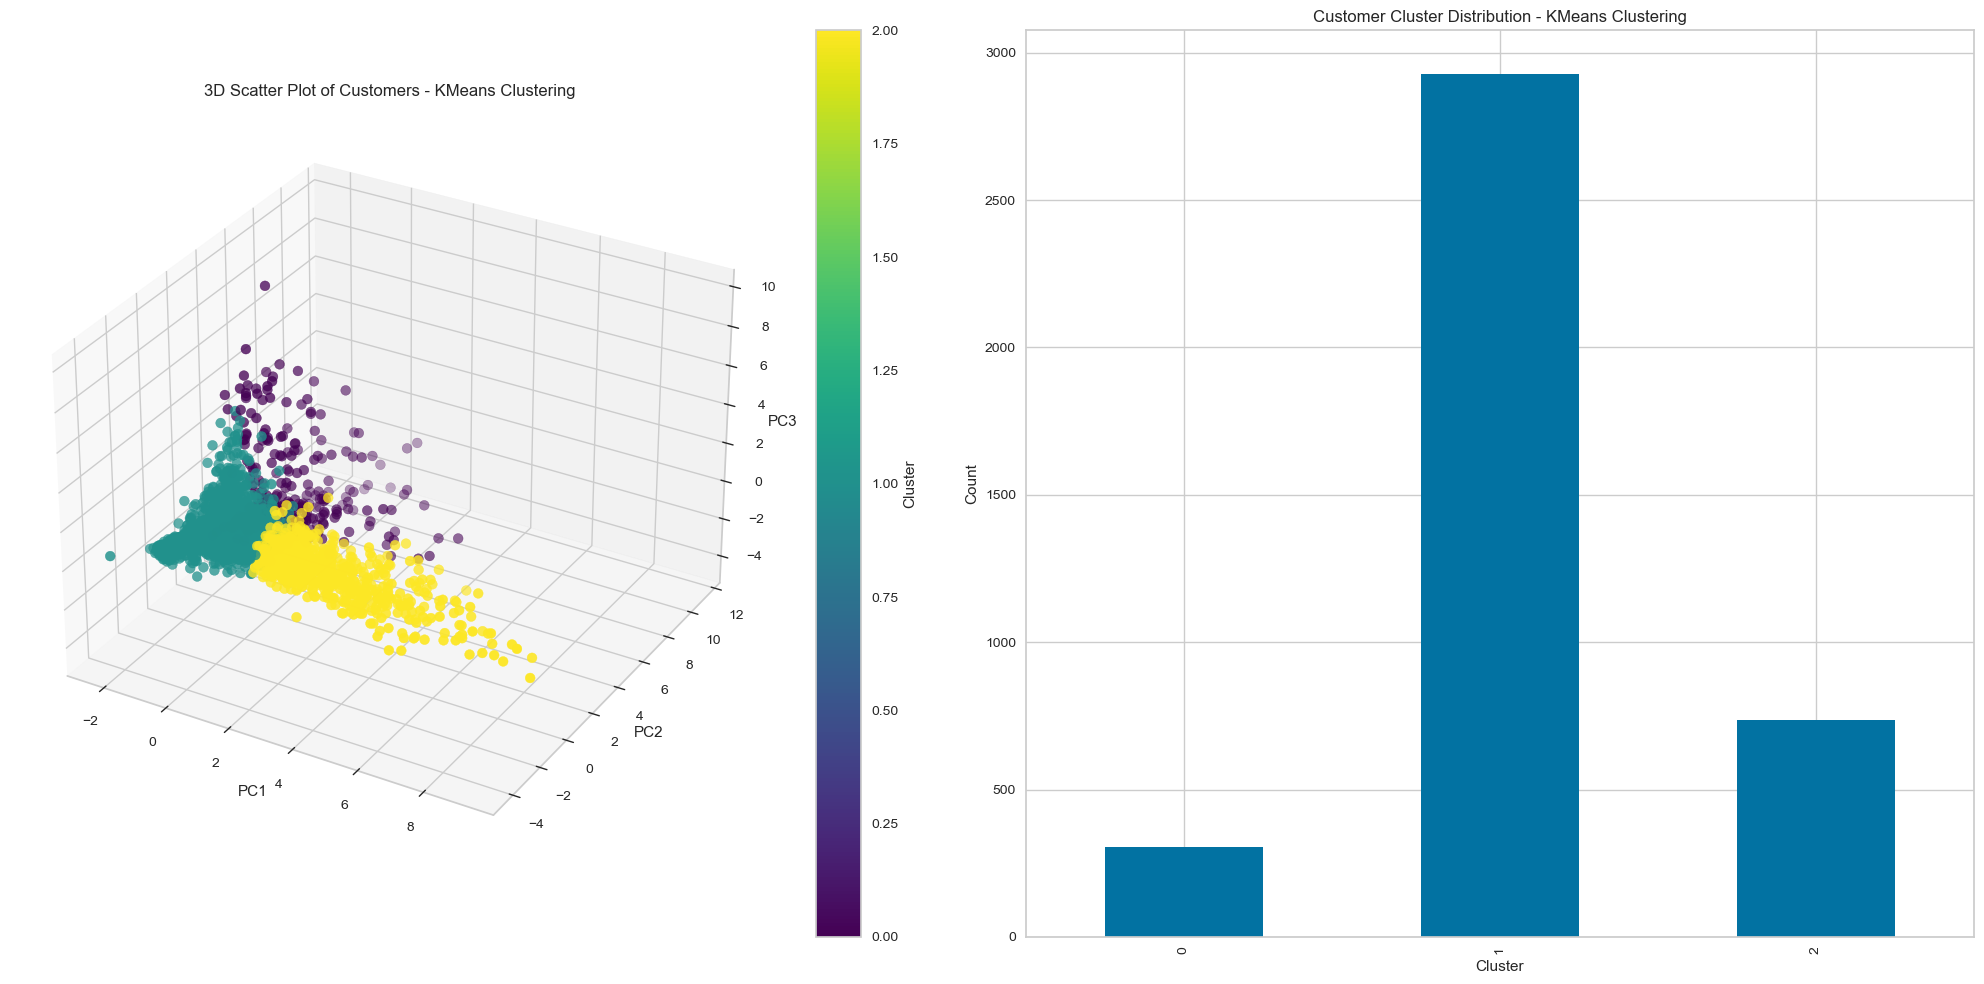

In [67]:
# Create a figure to hold both plots
fig = plt.figure(figsize=(20, 10))

# Add a 3D subplot for the scatter plot
ax1 = fig.add_subplot(121, projection='3d')

# Scatter plot of the data points
scatter = ax1.scatter(customer_df_pca["PC1"], customer_df_pca["PC2"], customer_df_pca["PC3"],
                      c=customer_df["KMeans_Cluster"], cmap='viridis', s=50)

# Set the title and labels for the 3D scatter plot
ax1.set_title('3D Scatter Plot of Customers - KMeans Clustering')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# Add a color bar for the scatter plot
fig.colorbar(scatter, ax=ax1, label='Cluster')

# Add a 2D subplot for the bar chart
ax2 = fig.add_subplot(122)

# Bar chart of the KMeans cluster counts
customer_df["KMeans_Cluster"].value_counts().sort_index().plot(kind="bar", ax=ax2)

# Set the title and labels for the bar chart
ax2.set_title('Customer Cluster Distribution - KMeans Clustering')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Count')

# Display the figure
plt.tight_layout()
plt.show()


In the 3D scatter plot, we can see how the data points are grouped into distinct clusters in the space defined by the first three principal components, as I cannot visualize all six components. The bar chart illustrates the distribution of data points across the identified clusters, revealing a significant imbalance with one cluster dominating, suggesting that most of the data points are similar according to the KMeans algorithm's criteria.

#### Q2.2 Build a second model to segment costumers and compare the performance. (10 points)

Next to my KMeans baseline model, I will employ Agglomerative Clustering, which is a hierarchical clustering technique that builds nested clusters by iteratively merging pairs of clusters starting with individual points. Unlike KMeans, which partitions the data into non-overlapping clusters based on distance to the centroid, Agglomerative Clustering creates a more informative dendrogram, offering a visual hierarchy of cluster formation and the flexibility to choose the cluster count after the model runs. 
Again, I use the silhouette score to find the optimal number of clusters, but also check the dendrogram.

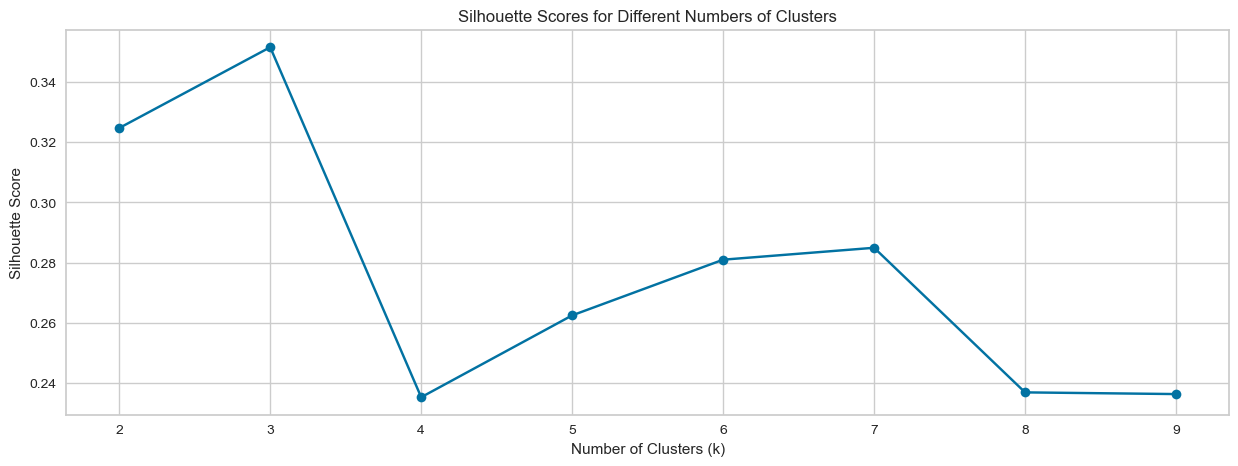

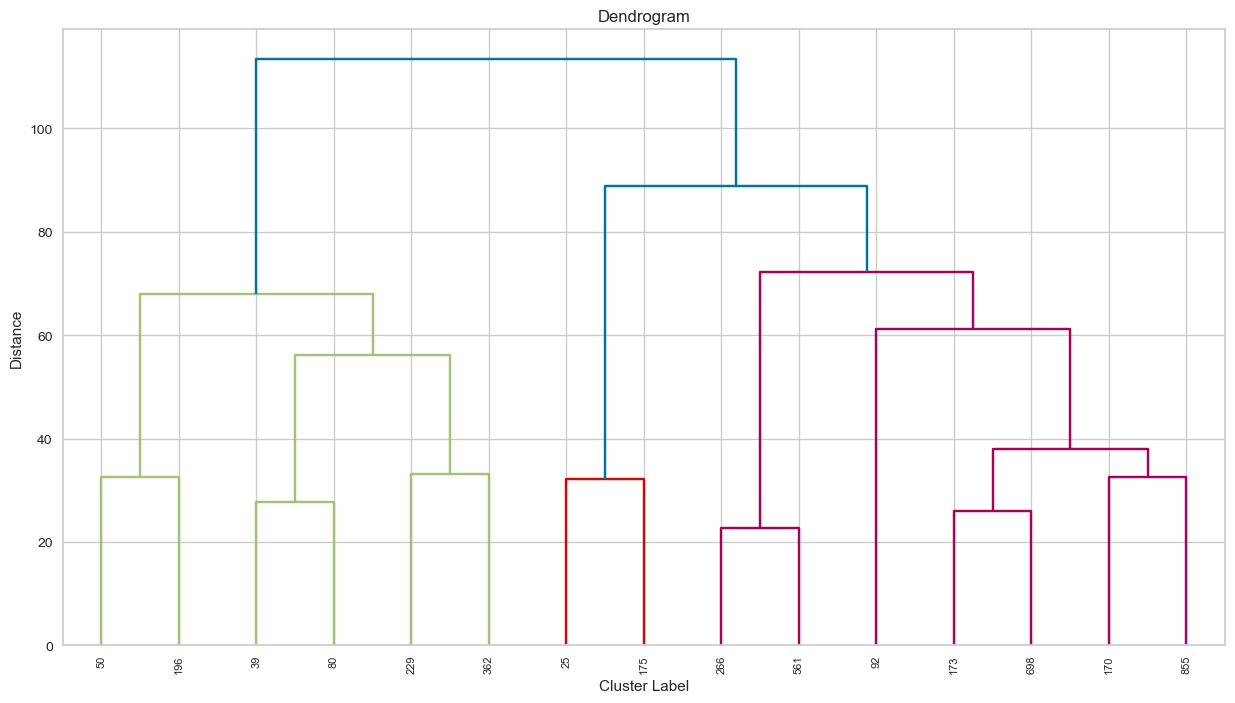

In [68]:
# Silhouette scores calculation for AgglomerativeClustering
silhouette_scores = []
for i in range(2, 10):
    model = AgglomerativeClustering(n_clusters=i)
    cluster_labels = model.fit_predict(customer_df_pca)
    silhouette_avg = silhouette_score(customer_df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(range(2, 10), silhouette_scores, marker='o')
ax.set_title("Silhouette Scores for Different Numbers of Clusters")
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Silhouette Score")
ax.grid(True)
plt.show()

# Dendrogram for AgglomerativeClustering
linkage_matrix = linkage(customer_df_pca, method='ward')

# Create a function to label the leaves
def leaf_label_func(id):
    return str(int(linkage_matrix[id - len(customer_df_pca), 3]))

fig, ax = plt.subplots(figsize=(15, 8))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8, truncate_mode='lastp', p=15, leaf_label_func=leaf_label_func)
ax.set_title('Dendrogram')
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Distance')
plt.show()


The optimal number of clusters, based on the silhouette scores, appears to be 3, since it has the highest silhouette score, indicating the best average distance between the clusters compared to within-cluster distances.
For the dendrogram it is important to note that the bigger the distance between two links, the bigger the difference in terms of the features. To determine the optimal number of clusters from the provided dendrogram, you would draw a horizontal line at the height where the largest gap between merges occurs. In this dendrogram, the largest gap appears to be present above the tall vertical line in the middle (the red cluster label). Drawing a horizontal line across this gap would intersect with the vertical lines, suggesting that the data may be optimally divided into three clusters.

In [69]:
# Instantiate the clustering model and fit it to the scaled data
hierarchical_cluster = AgglomerativeClustering(n_clusters=3)
customer_df["Agglomerative_Cluster"] = hierarchical_cluster.fit_predict(customer_df_pca)

# calculating the silhouette score
silhouette_score(customer_df_pca, customer_df["Agglomerative_Cluster"])

0.35162145000815903

The clusters retrieved from Agglomerative clustering have a silhouette score of approximately 0.35. Again, this suggests that, on average, the clusters 
are moderately distinct and separated from each other. However, comparing this to the score retrieved by the KMeans algorithm, it appears to be weaker.

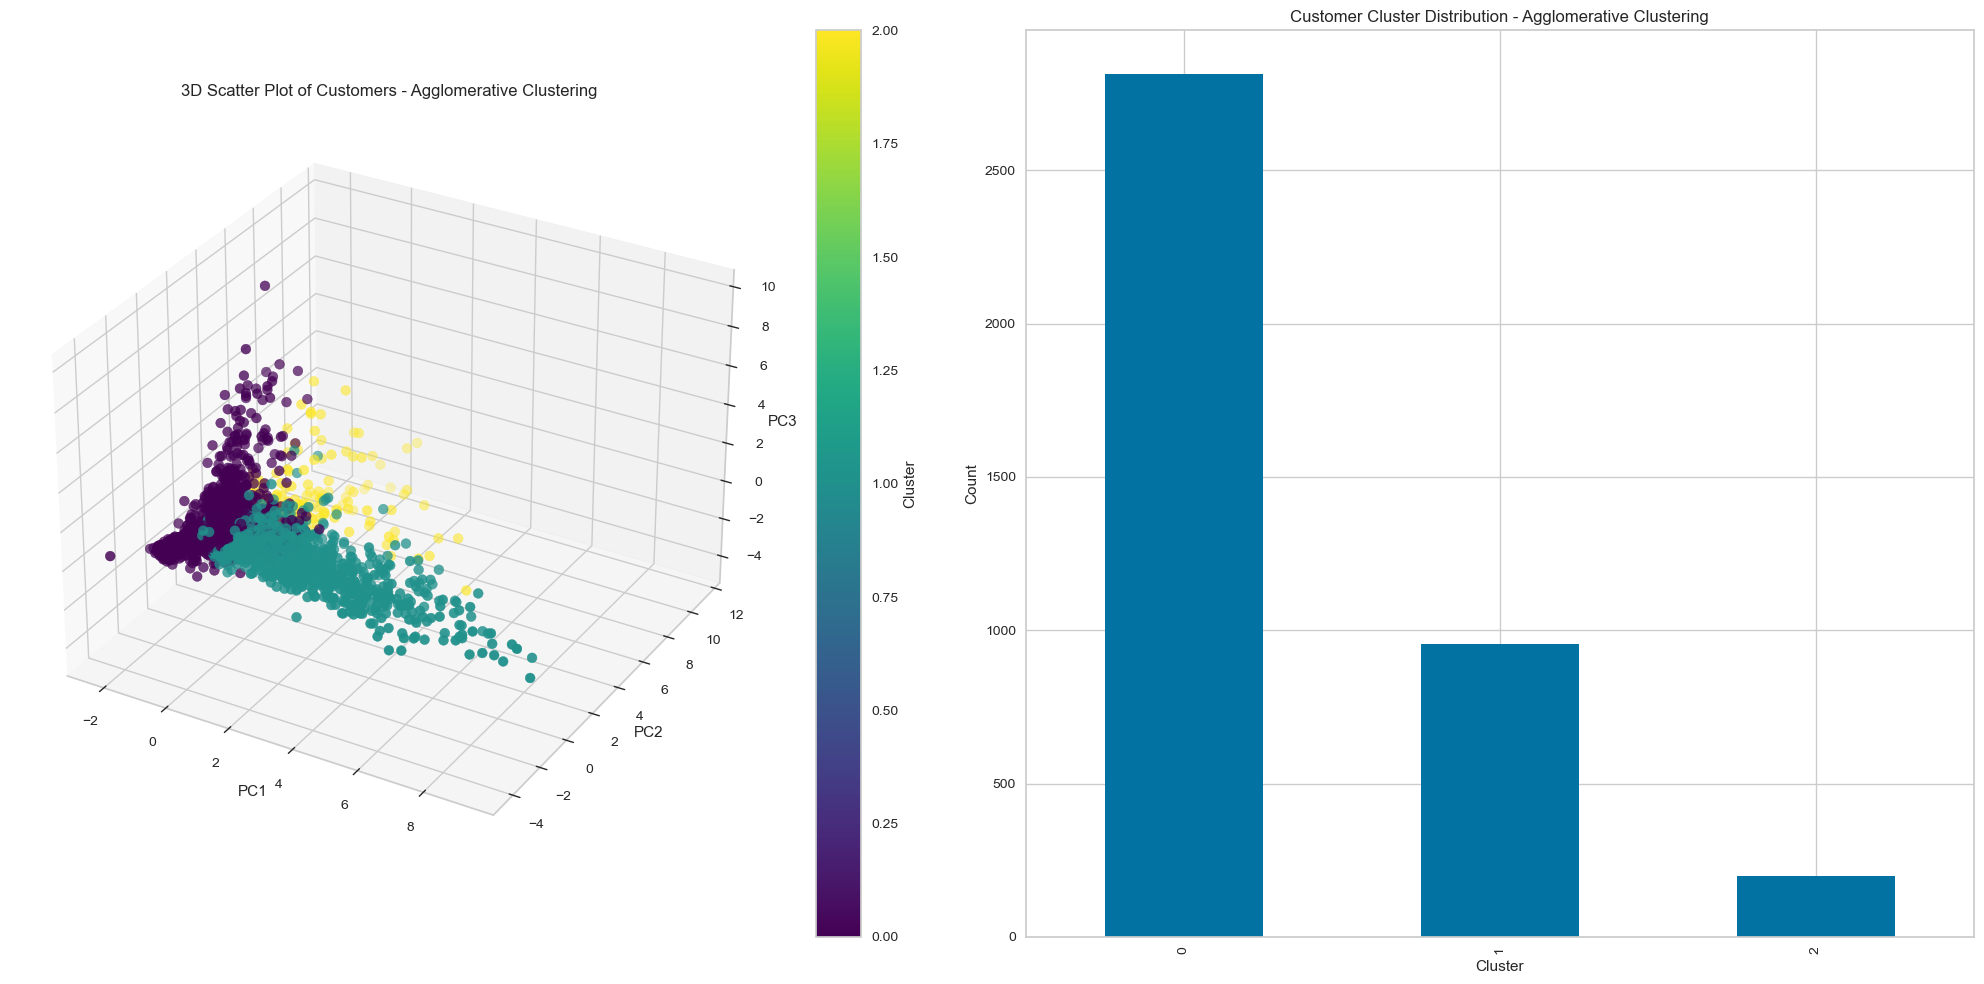

In [70]:
# Create a figure to hold both plots
fig = plt.figure(figsize=(20, 10))

# Add a 3D subplot for the scatter plot
ax1 = fig.add_subplot(121, projection='3d')

# Scatter plot of the data points
scatter = ax1.scatter(customer_df_pca["PC1"], customer_df_pca["PC2"], customer_df_pca["PC3"],
                      c=customer_df["Agglomerative_Cluster"], cmap='viridis', s=50)

# Set the title and labels for the 3D scatter plot
ax1.set_title('3D Scatter Plot of Customers - Agglomerative Clustering')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# Add a color bar for the scatter plot
fig.colorbar(scatter, ax=ax1, label='Cluster')

# Add a 2D subplot for the bar chart
ax2 = fig.add_subplot(122)

# Bar chart of the KMeans cluster counts
customer_df["Agglomerative_Cluster"].value_counts().sort_index().plot(kind="bar", ax=ax2)

# Set the title and labels for the bar chart
ax2.set_title('Customer Cluster Distribution - Agglomerative Clustering')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Count')

# Display the figure
plt.tight_layout()
plt.show()


Just like before, I decided to plot both, 3D scatter plot in the space defined by the first three principal components and a bar chart illustrating the distribution of data points across the identified clusters. Both charts are very similar to the ones shown in the first part of this task. Again, there is a significant imbalance with one cluster dominating, suggesting that most of the data points are similar according to the AgglomerativeClustering algorithm's criteria.

#### Q2.3 Based on the analysis, suggest a number of clusters and their characteristics to the head of marketing. Please justify your decisions. (10 points)

Looking at the analysis for the number of clusters for both algorithms, KMeans and Agglomerative, the number of clusters should be three, as this minimizes in both cases the silhouette scores, i.e. it provides the best performance by considering both cohesion and separation.

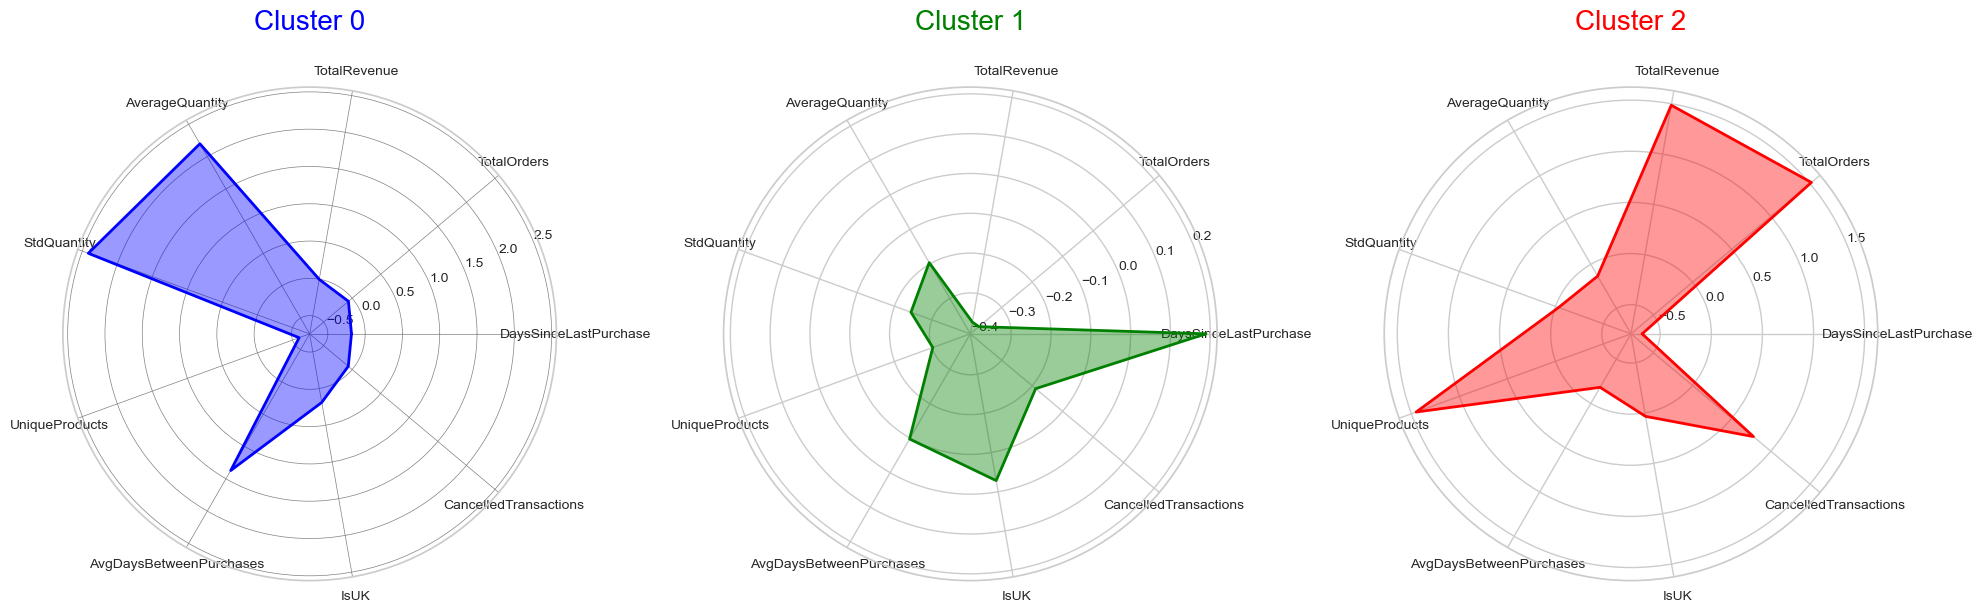

In [71]:
# drop the Agglomerative_Cluster columns and set the index to CustomerID
customer_df = customer_df.drop(columns="Agglomerative_Cluster").set_index("CustomerID")

# Standardize the data
scaler = StandardScaler()
customer_df_scaled = scaler.fit_transform(customer_df.drop(columns=["KMeans_Cluster"], axis = 1))

# Create a new DataFrame with the scaled data and the KMeans cluster
customer_df_scaled = pd.DataFrame(customer_df_scaled, columns=customer_df.columns[:-1], index=customer_df.index)
customer_df_scaled['KMeans_Cluster'] = customer_df['KMeans_Cluster']

# Calculate the mean of each cluster
cluster_mean = customer_df_scaled.groupby('KMeans_Cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set the number of variables
labels = np.array(cluster_mean.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in zip(range(3), ['blue', 'green', 'red']):
    data = cluster_mean.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

By looking at the characteristics of the cluster members, I can see the different profiles:

Cluster 0: **"Sporadic Bulk Shoppers"** – These customers are characterized by high variability and volume in their purchases with moderate purchase frequency, suggesting they make irregular but large transactions, perhaps for specific needs or occasions.

Cluster 1: **"Lapsed Customers"** – Indicated by high days since last purchase and lower metrics elsewhere, this cluster likely consists of past customers who haven't shopped recently, and when they did, their contribution to revenue and order count was minimal.

Cluster 2: **"High-Value Regulars"** – This group stands out with high total revenue, orders, and product variety, suggesting they are frequent shoppers making substantial purchases, although they also have a moderate level of cancelled transactions, perhaps due to the volume of their activity.

Understanding these clusters can help FarTrend tailor its customer engagement strategies. For instance, "Sporadic Bulk Shoppers" could be targeted with bulk discounts or volume deals to encourage more frequent purchases, while "Lapsed Customers" might be re-engaged with personalized marketing campaigns that highlight new inventory or offer special comeback promotions. "High-Value Regulars" are likely to respond well to loyalty programs and early access to new products, ensuring their continued patronage and potentially reducing the rate of cancelled transactions through enhanced customer service.

## Question 3: Create a recommendation system that helps the company to increase sales (35 points)


#### Q3.1 Build the recommendation system. (25 points)

I will use an item-based collaborative filtering (CF) recommender system. It predicts user preferences by analyzing similarities between items based on user ratings or interactions. This method often yields more stable recommendations over time and is more scalable as the number of items tends to grow slower than the number of users.

In order to start with this recommendation system, I have to define a rating. As I do not have the customers rating of the product they purchased, I will use the fact that they purchased vs not purchased vs cancelled as a rating.

In [72]:
# Create "rating" column for the transactions
transaction_df["Rating"] = transaction_df["Cancelled"].apply(lambda x: -1 if x == 1 else 1)

transaction_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,TotalPrice,YearMonth,Weekday,Hour,Rating
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,Dec_10,Wednesday,8,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,Dec_10,Wednesday,8,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,Dec_10,Wednesday,8,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,Dec_10,Wednesday,8,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,Dec_10,Wednesday,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390824,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,0,19.80,Dec_11,Friday,12,1
390825,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,0,23.40,Dec_11,Friday,12,1
390826,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0,10.20,Dec_11,Friday,12,1
390827,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0,12.60,Dec_11,Friday,12,1


For the recommendation system, I focus on customers with at least two purchases to ensure that there's enough data to meaningfully divide into train and test sets, which is crucial for validating the performance of my recommendation system. By sorting and ranking transactions, I create a temporal sequence that allows me to train on earlier data and test on the most recent, simulating how the system would perform in predicting future purchases. 

In [73]:
# only keep customers that have made at least 2 purchases
customer_transactions = transaction_df.groupby("CustomerID")["InvoiceNo"].nunique()
eligible_customers = customer_transactions[customer_transactions >= 2].index
transaction_df_aux = transaction_df[transaction_df["CustomerID"].isin(eligible_customers)]

# How many unique customers are there in the dataset?
print(f"Number of unique customers in entire dataset: {transaction_df_aux['CustomerID'].nunique()}")

# Sort transactions by 'CustomerID' and 'InvoiceDate'
transaction_df_sorted = transaction_df_aux.sort_values(by=['CustomerID', 'InvoiceDate'])

# Rank transactions within each customer group
transaction_df_sorted['Rank'] = transaction_df_sorted.groupby('CustomerID').cumcount() + 1

# Calculate total transactions per customer
transaction_df_sorted['TotalTransactions'] = transaction_df_sorted.groupby('CustomerID')['InvoiceNo'].transform('count')

# Determine split index (80% for training, ensuring at least 1 transaction being in both, train- and test set)
transaction_df_sorted['SplitIndex'] = np.ceil(transaction_df_sorted['TotalTransactions'] * 0.8)

# Split into train and test datasets
transaction_df_train = transaction_df_sorted[transaction_df_sorted['Rank'] <= transaction_df_sorted['SplitIndex']]
transaction_df_test = transaction_df_sorted[transaction_df_sorted['Rank'] > transaction_df_sorted['SplitIndex']]

# Drop unnecessary columns
transaction_df_train = transaction_df_train.drop(columns=['Rank', 'TotalTransactions', 'SplitIndex'])
transaction_df_test = transaction_df_test.drop(columns=['Rank', 'TotalTransactions', 'SplitIndex'])

# Check the shape of the train and test set and the number of unique customers
print(f"Shape of the train set: {transaction_df_train.shape}. Number of unique customers: {transaction_df_train['CustomerID'].nunique()}")
print(f"Shape of the test set: {transaction_df_test.shape}. Number of unique customers: {transaction_df_test['CustomerID'].nunique()}")


Number of unique customers in entire dataset: 2865
Shape of the train set: (286342, 14). Number of unique customers: 2865
Shape of the test set: (70142, 14). Number of unique customers: 2815


Note: Some customers might have a number of transactions that does not evenly split according to the 80-20 rule, especially after rounding. For customers with transactions just at the threshold (like exactly 2 or 3 transactions), the calculation and subsequent rounding might inadvertently allocate all transactions to the training set, particularly if the cumcount and split index calculation do not leave any transactions for the test set. Therefore, the slight difference in the number of unique customers in the train and test sets. In order to properly work with both sets, I, however, need to have each customer be represented in both sets, otherwise testing is not possible. Thus, I simply drop the customers that are not in the test set from the train set.

In [74]:
# dropping rows with customerID that are not in the test set from the train set
transaction_df_train = transaction_df_train[transaction_df_train["CustomerID"].isin(transaction_df_test["CustomerID"])]

# Check the shape of the train and test set and the number of unique customers
print(f"Shape of the train set: {transaction_df_train.shape}. Number of unique customers: {transaction_df_train['CustomerID'].nunique()}")
print(f"Shape of the test set: {transaction_df_test.shape}. Number of unique customers: {transaction_df_test['CustomerID'].nunique()}")

Shape of the train set: (286187, 14). Number of unique customers: 2815
Shape of the test set: (70142, 14). Number of unique customers: 2815


Now, that I have both, my train and test set, defined, I create a user-item-interaction matrix, as well as an item-item-similarity matrix. The measurement for similarity I will use is the cosine similarity, which determines similarity between two vectors by calculating the cosine of the angle between them, irrespective of the magnitude.

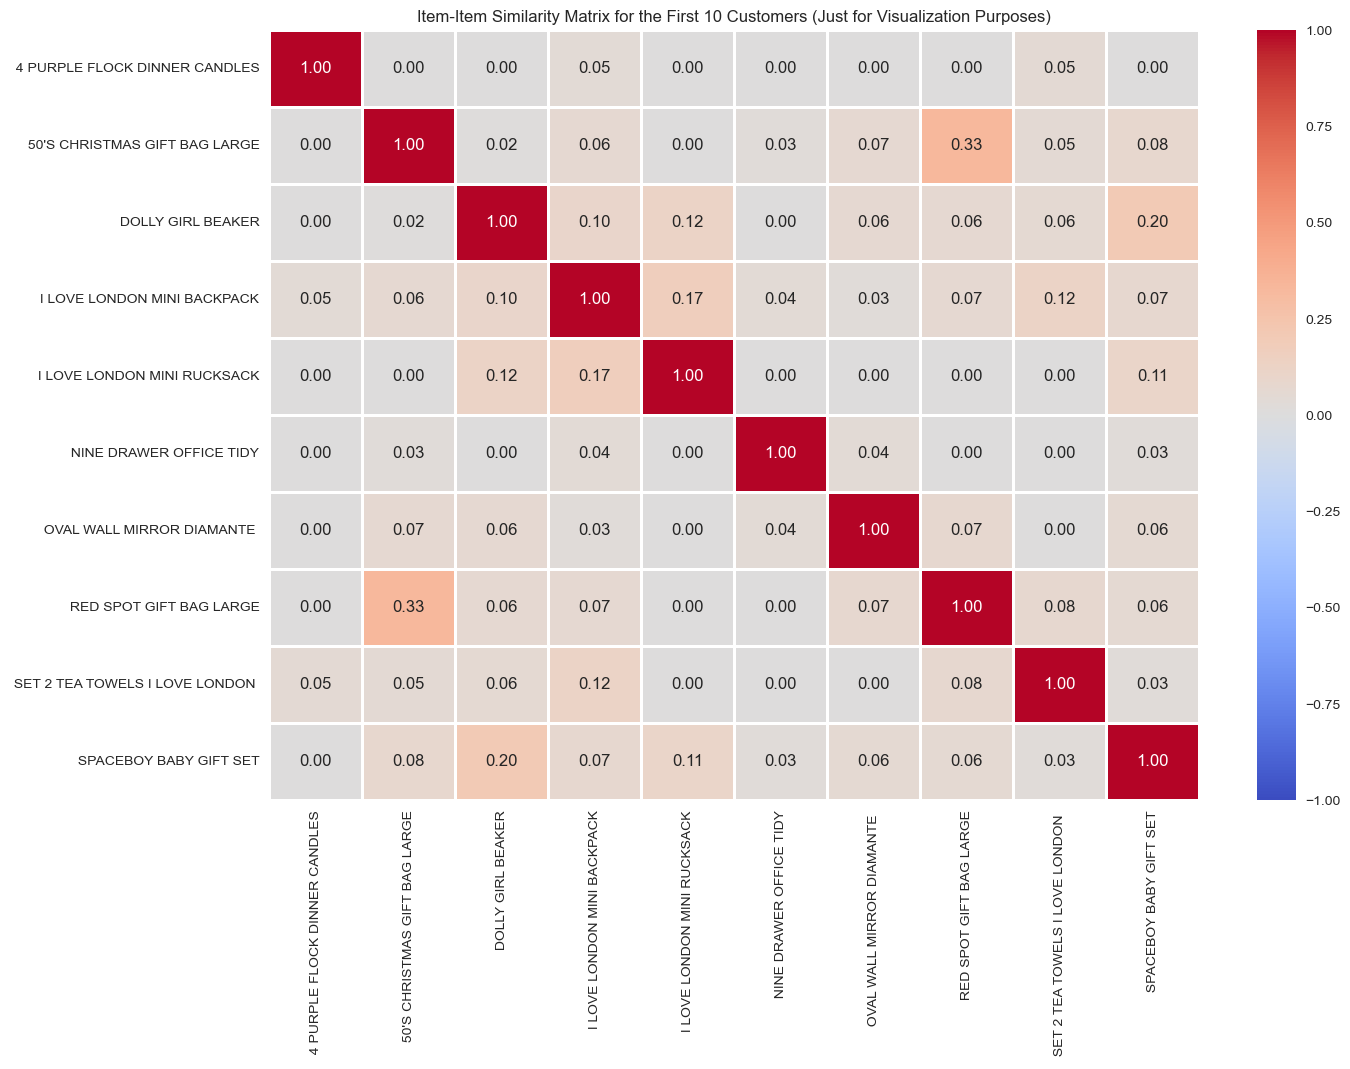

In [75]:
# Create a pivot table of the transactions data
pivot_df = transaction_df_train.pivot_table(index="CustomerID", columns="Description", values="Rating", fill_value=0)

# Creating the user-user similarity matrix using cosine similarity
item_item_similarity = cosine_similarity(pivot_df.T)

# heatmap of the user-user similarity matrix
plt.figure(figsize=(15, 10))
customer_ids = pivot_df.T.index[:10].tolist()
sns.heatmap(item_item_similarity[:10, :10], cmap="coolwarm", vmin=-1, vmax=1,
            linewidths=2, annot=True, fmt=".2f",
            xticklabels=customer_ids, yticklabels=customer_ids)
plt.title("Item-Item Similarity Matrix for the First 10 Customers (Just for Visualization Purposes)")
plt.show()

# Create a dataframe from the user-user similarity matrix
item_item_similarity_df = pd.DataFrame(item_item_similarity, index=pivot_df.T.index, columns=pivot_df.T.index)

In order to define whether an item is similar to another item, I have to define a threshold for the cosine-similarity. For that I will use the minimum of the max values of each rows in the item-item-similarity matrix. I, however, do not choose the smallest overall, but the 1000th smallest value. This implies that 999 items do not have any similar items, as all of them have a cosine-similarity with that respective item below the threshold. For those special instances, I will later fill the recommendations with the most popular items.

In [76]:
item_item_similarity_df.apply(lambda x: x.nlargest(2).iloc[-1], axis=1).nsmallest(1000).sort_values(ascending=False).head(5)

Description
BOOM BOX SPEAKER BOYS              0.357771
CHRISTMAS LIGHTS 10 SANTAS         0.357749
CHRISTMAS LIGHTS 10 REINDEER       0.357749
SWISS CHALET TREE DECORATION       0.357599
DARK BIRD HOUSE TREE DECORATION    0.357599
dtype: float64

To generate a predictive rating for the target user on items they haven't purchased, I calculate the weighted sum of the user's ratings on similar items, using the similarities that I retrieved before as weights, thereby predicting how much the user might like new items based on their past preferences. Then, I rank these predictive ratings and select the top N products to offer the user the most appealing recommendations, aiming to increase satisfaction and the likelihood of purchase.
As aforementioned, I use the most popular items if I don't have enough recommendations from the similar items, ensuring that the user receives a full set of recommendations and leveraging the wisdom of the crowd where individual preferences are not as pronounced.

In [77]:
def get_recommendations(customer_id, similarity_df, interaction_df, most_popular_items, threshold=0.357771, N=5):
    # Get the ratings and similarities for the customer
    customer_ratings = interaction_df.loc[customer_id]
    customer_similarities = similarity_df.where(similarity_df > threshold, 0)

    # Compute weighted rating sums across similar items (ignoring items below threshold)
    weighted_rating_sums = (customer_similarities * customer_ratings).sum(axis=1)

    # Compute the sum of similarities for similar items only
    sum_of_similarities = customer_similarities.sum(axis=1)
    
    # Predict ratings by dividing the weighted sums by the sum of similarities
    # Avoid division by zero by replacing 0 with NaN and then using fillna
    predicted_ratings = weighted_rating_sums / sum_of_similarities.replace(0, np.NaN)
    predicted_ratings = predicted_ratings.fillna(0)
    
    # Get items the customer has not purchased
    non_purchased_items = customer_ratings[customer_ratings == 0].index
    
    # Get predicted ratings for items the customer has not purchased
    non_purchased_predictions = predicted_ratings[non_purchased_items]
    
    # Get the top N recommendations
    top_n_recommendations = non_purchased_predictions.nlargest(N).index.tolist()
    
    # Fill in any missing recommendations with the most popular items
    recommendations_needed = N - len(top_n_recommendations)
    if recommendations_needed > 0:
        # Filter out most popular items that the user has already interacted with
        additional_recommendations = [item for item in most_popular_items if item not in top_n_recommendations][:recommendations_needed]
        top_n_recommendations.extend(additional_recommendations)

    return top_n_recommendations

# Calculate the most popular items
item_popularity = pivot_df.mean().sort_values(ascending=False)
most_popular_items = item_popularity.head(5).index.tolist()

# Generate the recommendation DataFrame
recommendation_df = pivot_df.apply(lambda x: get_recommendations(x.name, item_item_similarity_df, pivot_df, most_popular_items), axis=1)

# Post-process to format the DataFrame
recommendation_df = recommendation_df.apply(pd.Series)
recommendation_df.columns = [f"Recommendation {i}" for i in range(1, 6)]

In [78]:
recommendation_df

,Recommendation 1,Recommendation 2,Recommendation 3,Recommendation 4,Recommendation 5
CustomerID,,,,,
12347,PINK REGENCY TEACUP AND SAUCER,ALARM CLOCK BAKELIKE IVORY,SET OF 3 REGENCY CAKE TINS,GREEN 3 PIECE POLKADOT CUTLERY SET,60 CAKE CASES DOLLY GIRL DESIGN
12348,PACK OF 60 SPACEBOY CAKE CASES,PACK OF 12 PINK POLKADOT TISSUES,PACK OF 60 DINOSAUR CAKE CASES,PACK OF 60 MUSHROOM CAKE CASES,PACK OF 72 RETROSPOT CAKE CASES
12352,CERAMIC CHERRY CAKE MONEY BANK,DOG BOWL VINTAGE CREAM,RECIPE BOX PANTRY YELLOW DESIGN,VINTAGE CREAM CAT FOOD CONTAINER,SET OF 4 ENGLISH ROSE PLACEMATS
12356,PACK OF 60 SPACEBOY CAKE CASES,MINI CAKE STAND WITH HANGING CAKES,PACK OF 60 DINOSAUR CAKE CASES,PACK OF 60 PINK PAISLEY CAKE CASES,PACK OF 60 MUSHROOM CAKE CASES
12358,CERAMIC PLATE STRAWBERRY DESIGN,BLACK/BLUE POLKADOT UMBRELLA,SWEETHEART CERAMIC TRINKET BOX,CERAMIC CAKE DESIGN SPOTTED MUG,MINI CAKE STAND WITH HANGING CAKES
...,...,...,...,...,...
18272,3 PIECE SPACEBOY COOKIE CUTTER SET,WHITE SPOT RED CERAMIC DRAWER KNOB,BLUE POLKADOT EGG CUP,RECIPE BOX BLUE SKETCHBOOK DESIGN,75 BLACK PETIT FOUR CASES
18277,EDWARDIAN PARASOL BLACK,EDWARDIAN PARASOL NATURAL,PAINTED METAL PEARS ASSORTED,HANGING METAL HEART LANTERN,BLACK/BLUE POLKADOT UMBRELLA
18282,CARD MOTORBIKE SANTA,PAPER BUNTING RETROSPOT,SET OF 6 SNACK LOAF BAKING CASES,REGENCY SUGAR TONGS,REGENCY TEAPOT ROSES


Now, in order to evaluate this recommender system, I will use the Mean Reciprocal Rank and the hit rate. As each row only represents one single product, This is a valid approach. For that I will first merge my recommendations with my test set, and then check the hits / the reciprocal rate. The next step is then to calculate the mean of the respective values.

In [79]:
# Merge the test set purchases with the recommendations for each customer
merged_df = transaction_df_test.merge(recommendation_df, on="CustomerID")

# Define a function to calculate average precision for each customer
def reciprocal_rank(row):
    hits = 0
    sum_precisions = 0
    for i in range(1, 6):
        recommendation = row[f'Recommendation {i}']
        if recommendation in row['Description']:
            hits += 1
            sum_precisions += hits / i
    return sum_precisions / hits if hits > 0 else 0

# Apply the function to each row and calculate MAP
merged_df['reciprocal_rank'] = merged_df.apply(reciprocal_rank, axis=1)
mean_reciprocal_rank = merged_df['reciprocal_rank'].mean()

print(f'Mean Reciprocal Rank: {mean_reciprocal_rank}')

Mean Reciprocal Rank: 0.00864128006995333


In [80]:
# Define a function to check if the Description is an exact match with any of the recommendations
def check_exact_match(row, recommendations):
    return row['Description'] in row[recommendations].values

# List of recommendation column names, adjust as necessary
recommendation_columns = ['Recommendation 1', 'Recommendation 2', 'Recommendation 3', 'Recommendation 4', 'Recommendation 5']

# Apply the function to each row
merged_df['Hit'] = merged_df.apply(check_exact_match, axis=1, recommendations=recommendation_columns)

print(f"The hit rate is {merged_df['Hit'].mean() * 100:.2f}%")

The hit rate is 1.68%


I have a MRR of 0.8% and a hit rate of 1.68%. An MRR (Mean Reciprocal Rank) of 0.8% indicates that the first relevant recommendation typically appears quite low in the ranking order, suggesting users often need to look through many suggestions before finding a useful one. A hit rate of 1.68% means that only a small fraction of all the recommendations made are relevant to the users, pointing to a system that struggles to identify items of interest effectively. Both metrics suggest that there is significant room for improvement in the recommendation system's accuracy and its ability to present relevant items to users earlier in the recommendation list.

#### Q3.2 Based on the analysis, suggest how the model can be used in marketing. Which data would you like to have to improve the results? Please justify your decisions. (10 points)

The current recommender system can be utilized in marketing to personalize product displays on FarTrend's website or in email campaigns, by showcasing top N (I used 5, but this number can be adjusted) recommendations that align with each customer's purchase history, thus increasing the likelihood of conversion. The system could also be used for inventory management, by identifying items frequently bought together and ensuring they are stocked or promoted in unison. To augment user engagement, marketing could leverage popular items as a gateway, presenting them alongside personalized recommendations to draw in users with familiar products, then guiding them towards new discoveries.

To improve the results, additional data such as user browse time, page views, and wish lists could give a more nuanced view of user interest beyond purchase history. Ratings or reviews would allow for explicit feedback, enhancing the accuracy of the predictive model. Understanding the reasons behind cancellations and returns through customer feedback could refine recommendations further, avoiding items with higher dissatisfaction rates. Lastly, integrating time-based data, like seasonality or purchase frequency, could help anticipate when customers are more likely to buy, allowing for timely and proactive recommendations.

Note: Before rolling this model out, it should be trained with the entire dataset, even though I believe that this model is far away from being ready for a roll out. A next step would include implementing a model based approach, instead of the neighborhood approach and compare the results. The additinal data, that I mentioned above, would help enormously though!